# Section 1. Introduction to the problem/task and dataset

The chosen dataset for this machine project is the [FIFA Players Dataset](https://www.kaggle.com/datasets/maso0dahmed/football-players-data). The original dataset contains a total of 17954 rows and 51 features. The features contain identifying data (eg. name, birth_data), performance metrics (eg. overall_rating, freekick_accuracy) and other player-related statistics (eg. balance, agression, stamina). The dataset was created and sourced by Masood Ahmed and Talha Turab and is free to use in Kaggle. The data was scraped by the authors from [SoFIFA.com](https://sofifa.com/), a FIFA player statistic site spanning the various FIFA games.

The model aim to predict a players rating given relevant features. Therefore, this problem classifies as a regression task. 

# Section 2. Description of the dataset

The dataset only includes one csv file. Each of the \~18k rows in the dataset represents a FIFA Player. Their 51 columns represent the dataset features. These features include (feature descriptions sourced from the dataset authors, see [here](https://www.kaggle.com/datasets/maso0dahmed/football-players-data/data#:~:text=and%20career%20progressions.-,Features%3A,-name%3A%20Name%20of):

## Features

- **name**: Name of the player.
- **full_name**: Full name of the player.
- **birth_date**: Date of birth of the player.
- **age**: Age of the player.
- **height_cm**: Player's height in centimeters.
- **weight_kgs**: Player's weight in kilograms.
- **positions**: Positions the player can play.
- **nationality**: Player's nationality.
- **overall_rating**: Overall rating of the player in FIFA.
- **potential**: Potential rating of the player in FIFA.
- **value_euro**: Market value of the player in euros.
- **wage_euro**: Weekly wage of the player in euros.
- **preferred_foot**: Player's preferred foot.
- **international_reputation**(1-5): International reputation rating from 1 to 5.
- **weak_foot**(1-5): Rating of the player's weaker foot from 1 to 5.
- **skill_moves**(1-5): Skill moves rating from 1 to 5.
- **body_type**: Player's body type.
- **release_clause_euro**: Release clause of the player in euros.
- **national_team**: National team of the player.
- **national_rating**: Rating in the national team.
- **national_team_position**: Position in the national team.
- **national_jersey_number**: Jersey number in the national team.
- **crossing**: Rating for crossing ability.
- **finishing**: Rating for finishing ability.
- **heading_accuracy**: Rating for heading accuracy.
- **short_passing**: Rating for short passing ability.
- **volleys**: Rating for volleys.
- **dribbling**: Rating for dribbling.
- **curve**: Rating for curve shots.
- **freekick_accuracy**: Rating for free kick accuracy.
- **long_passing**: Rating for long passing.
- **ball_control**: Rating for ball control.
- **acceleration**: Rating for acceleration.
- **sprint_speed**: Rating for sprint speed.
- **agility**: Rating for agility.
- **reactions**: Rating for reactions.
- **balance**: Rating for balance.
- **shot_power**: Rating for shot power.
- **jumping**: Rating for jumping.
- **stamina**: Rating for stamina.
- **strength**: Rating for strength.
- **long_shots**: Rating for long shots.
- **aggression**: Rating for aggression.
- **interceptions**: Rating for interceptions.
- **positioning**: Rating for positioning.
- **vision**: Rating for vision.
- **penalties**: Rating for penalties.
- **composure**: Rating for composure.
- **marking**: Rating for marking.
- **standing_tackle**: Rating for standing tackle.
- **sliding_tackle**: Rating for sliding tackle.




# Importing the following libraries

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import itertools

# Reading and collecting a brief overview of the dataset

In [232]:
df = pd.DataFrame()
df = pd.read_csv("./fifa_players.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [233]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [234]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [235]:
datatypes = df.dtypes
datatypes

name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
potential                          int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy

# Cleaning the dataset

In [236]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [237]:
old_length = len(df)

# Drop duplicates
df = df.drop_duplicates(keep = 'first', inplace = False) 

# Drop rows with null popularity
df = df.dropna(subset=["value_euro","wage_euro"])

# Drop columns with high null values
df = df.drop(columns=["release_clause_euro", "national_team", "national_rating", "national_team_position","national_jersey_number"])

new_length = len(df)

(str(old_length - new_length) + " rows were dropped")

'255 rows were dropped'

### Look through dataset for multiple representations and to understand the values better

In [311]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


name column is being written
name has been written
full_name column is being written
full_name has been written
birth_date column is being written
birth_date has been written
age column is being written
age has been written
height_cm column is being written
height_cm has been written
weight_kgs column is being written
weight_kgs has been written
positions column is being written
positions has been written
nationality column is being written
nationality has been written
overall_rating column is being written
overall_rating has been written
potential column is being written
potential has been written
value_euro column is being written
value_euro has been written
wage_euro column is being written
wage_euro has been written
preferred_foot column is being written
preferred_foot has been written
international_reputation(1-5) column is being written
international_reputation(1-5) has been written
weak_foot(1-5) column is being written
weak_foot(1-5) has been written
skill_moves(1-5) column is 

## Binning the data based on the kind of position they play

In [312]:
def assign_based_on_first_match(positions):
    # Split the positions into a list
    position_list = positions.split(',')
    
    # Iterate through positions and assign category based on the first match
    for position in position_list:
        if position in position_to_category:
            return position_to_category[position]
    
    return 'Unknown'  # In case no position matches


In [313]:
# Define bins for positions
bins = {
    1: ['CF', 'ST', 'LW', 'RW'],
    2: ['CAM', 'CM', 'CDM', 'LM', 'RM'],
    3: ['CB', 'LB', 'RB', 'LWB', 'RWB'],
    4: ['GK']
}

# Reverse map positions to categories
position_to_category = {}
for category, positions in bins.items():
    for position in positions:
        position_to_category[position] = category

# Apply the function to the DataFrame
df['Category'] = df['positions'].apply(assign_based_on_first_match)

df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,Category
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,48,22,94,94,75,96,33,28,26,1
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,46,56,84,91,67,88,59,57,22,2
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,78,64,82,88,82,87,63,67,67,2
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,34,26,83,87,61,83,51,24,22,1
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,87,88,24,49,33,80,91,88,87,3


## Look for outliers within the dataset

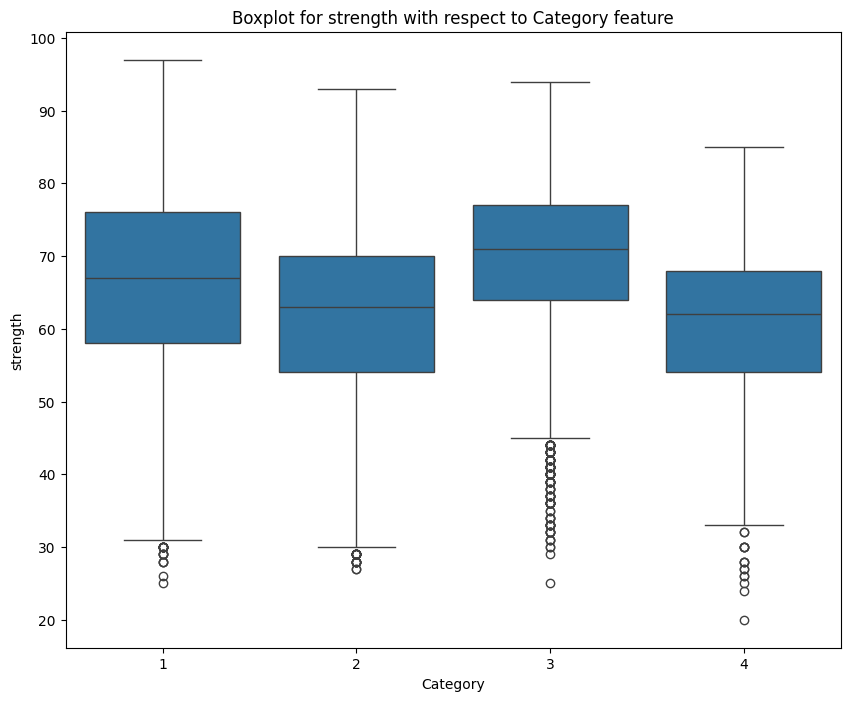

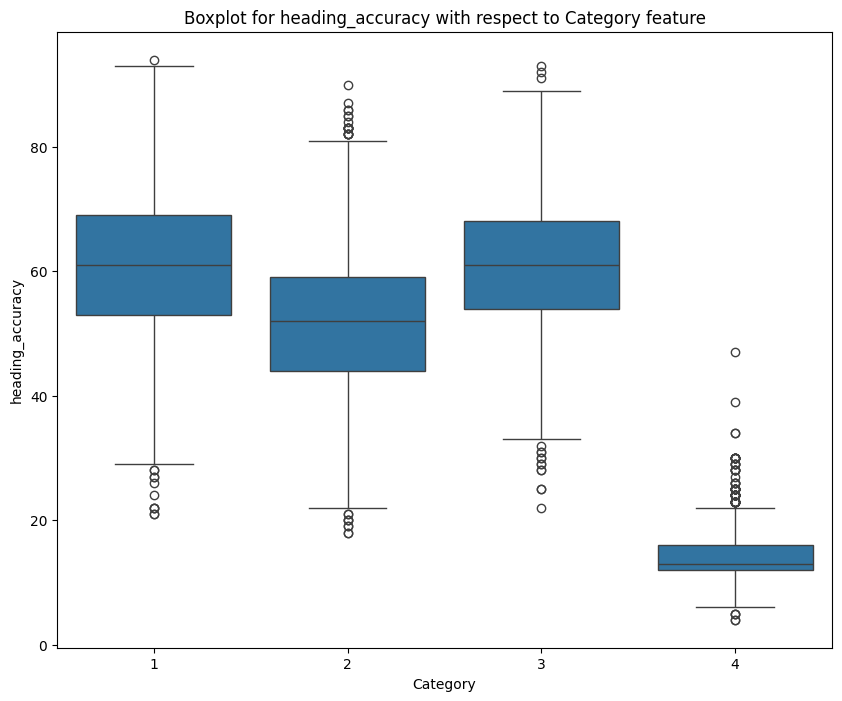

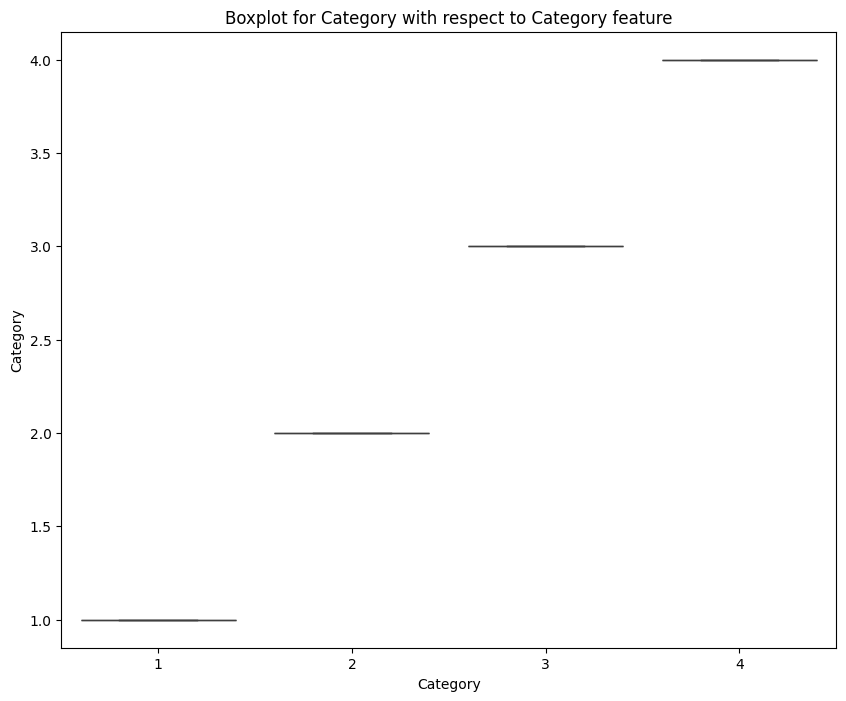

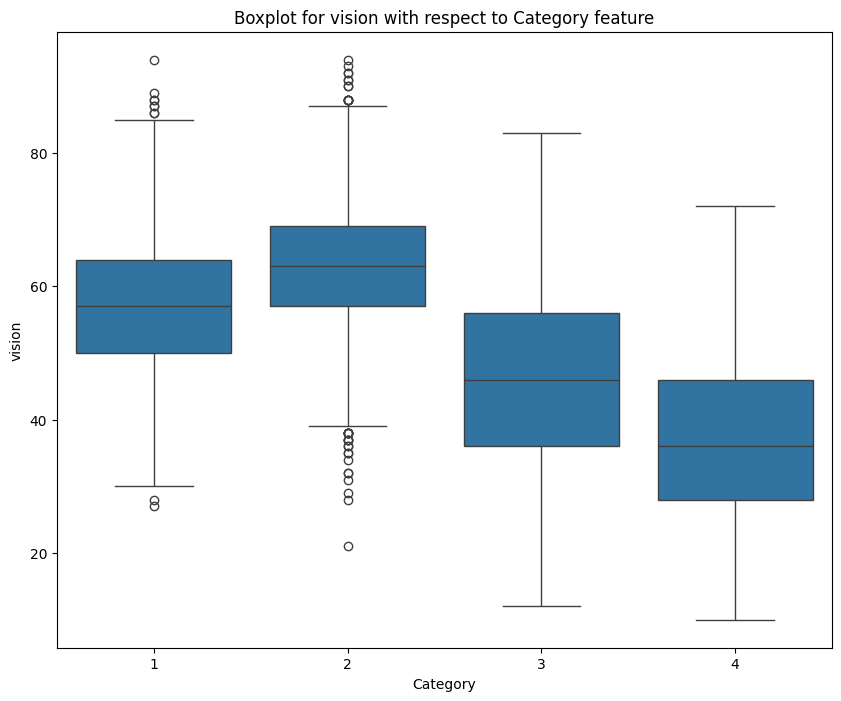

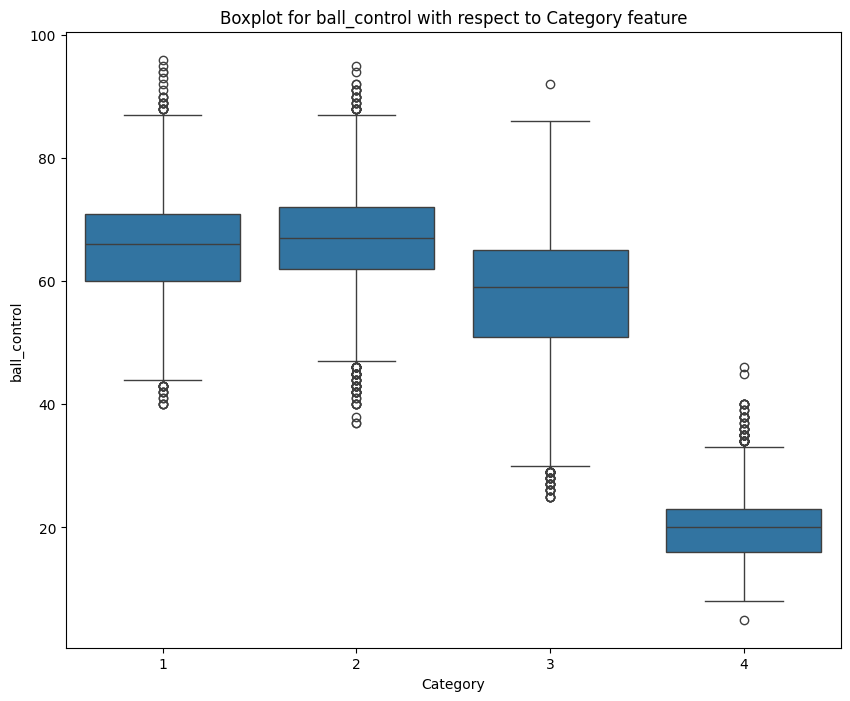

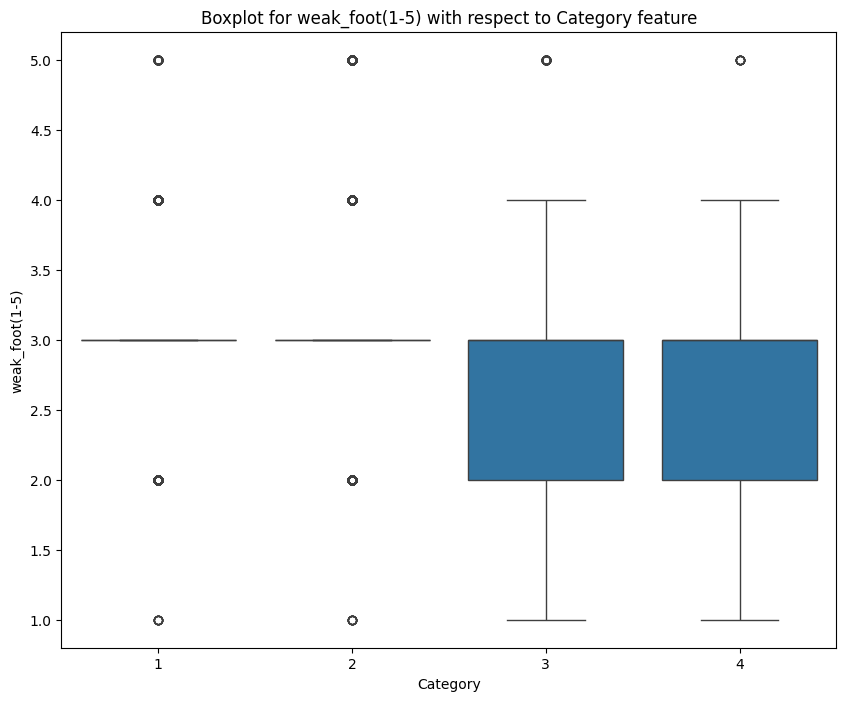

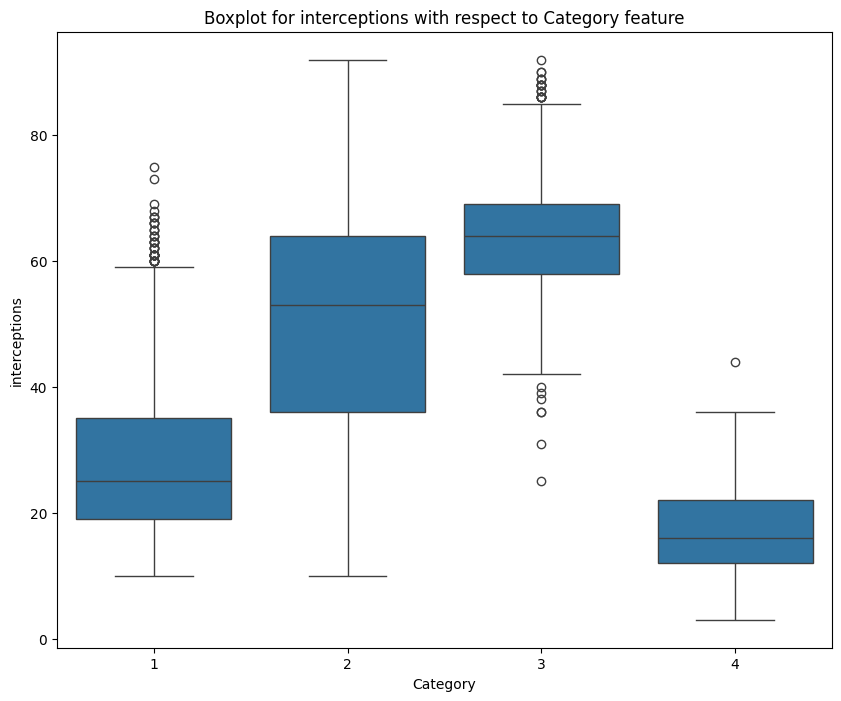

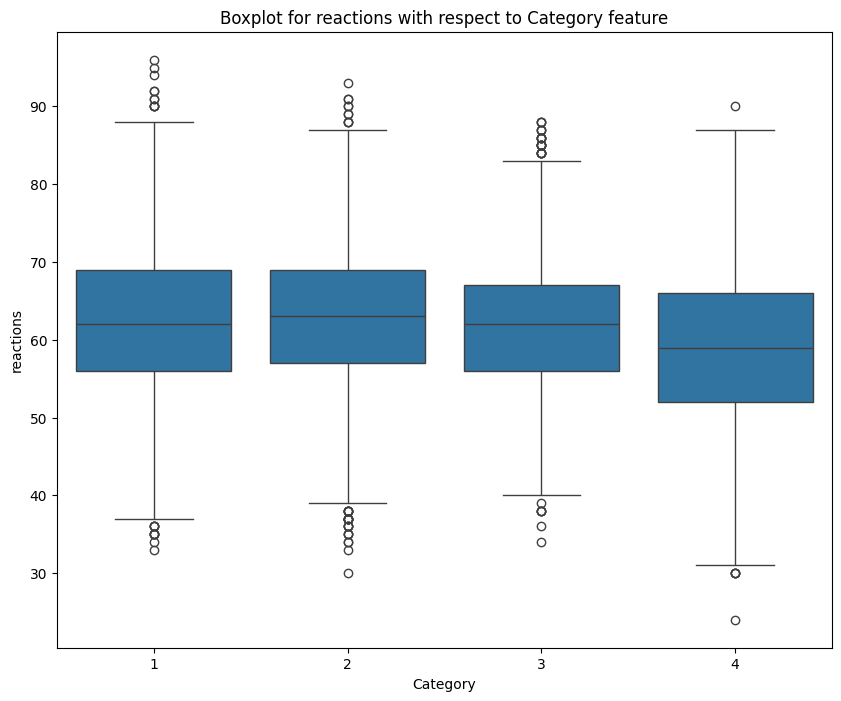

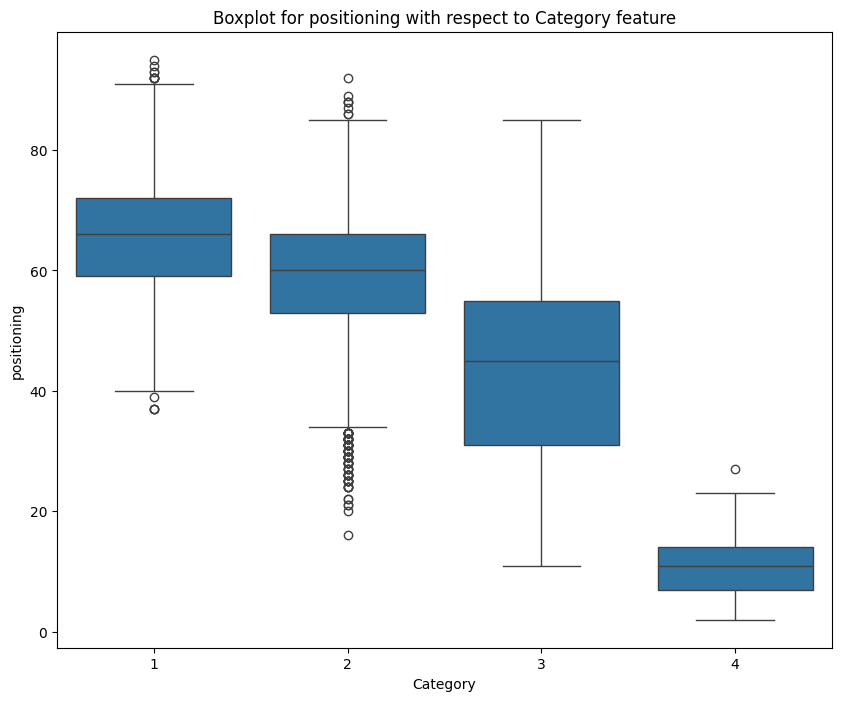

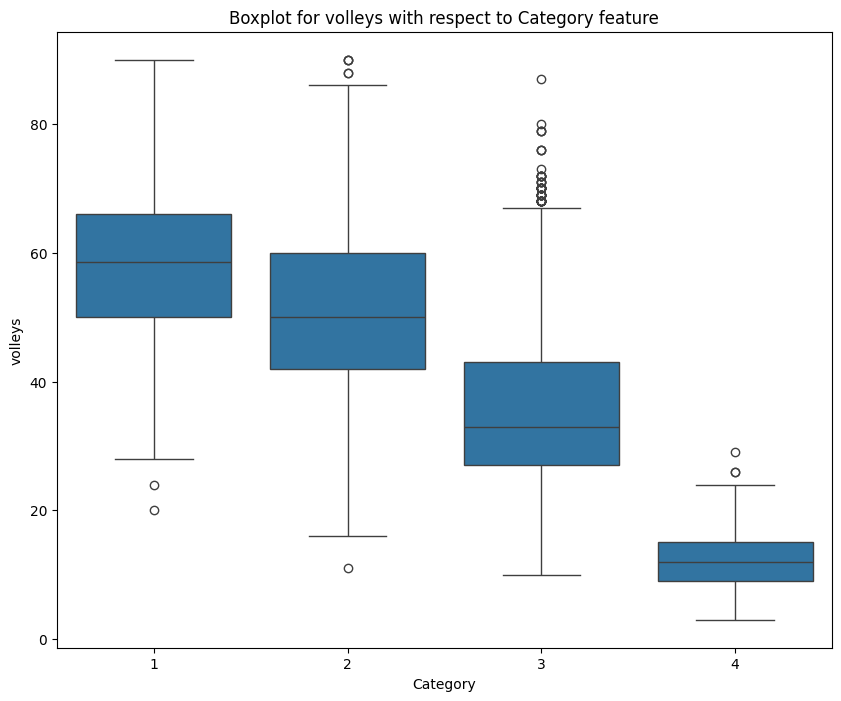

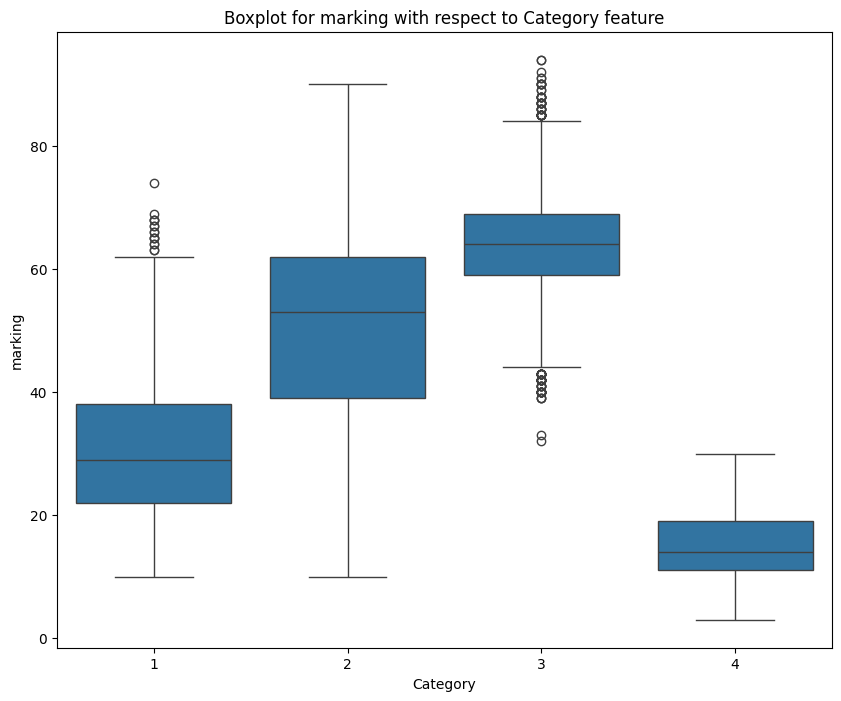

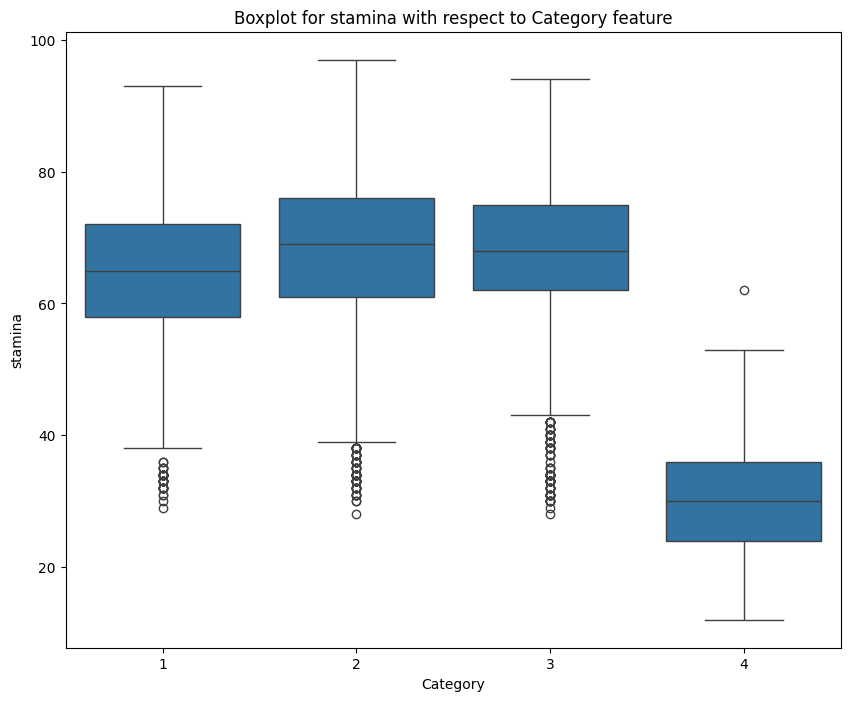

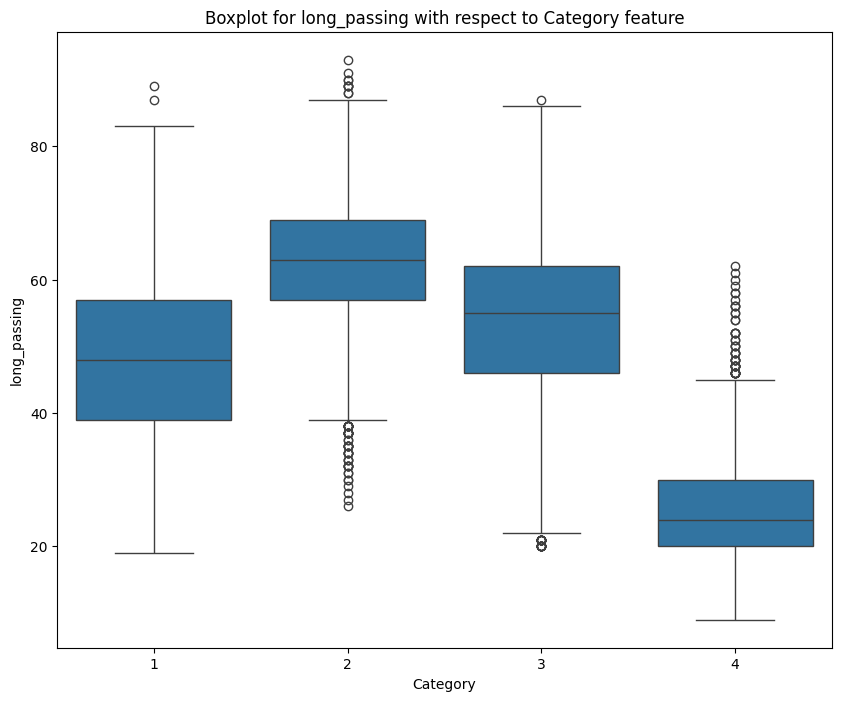

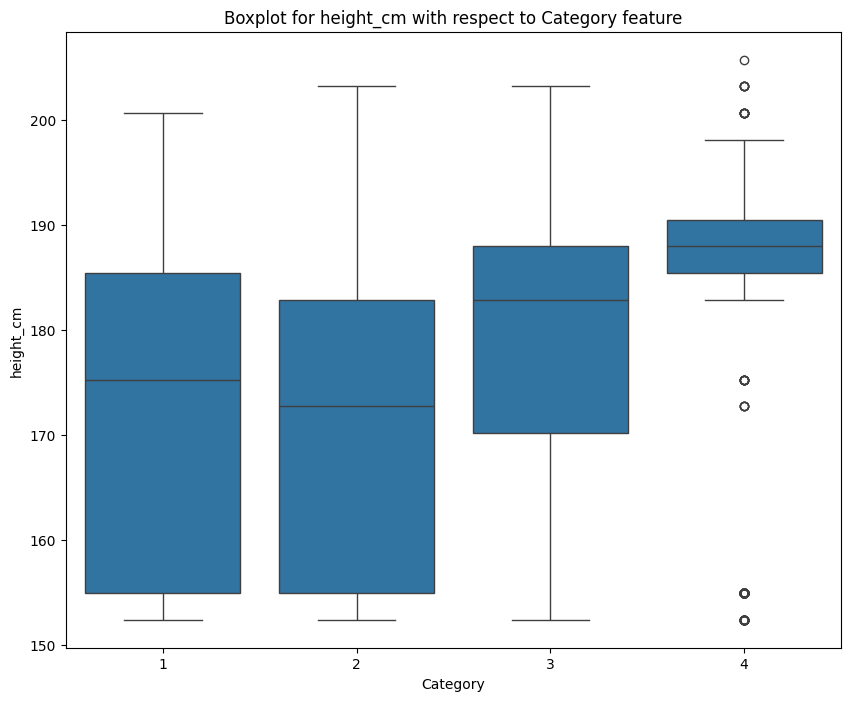

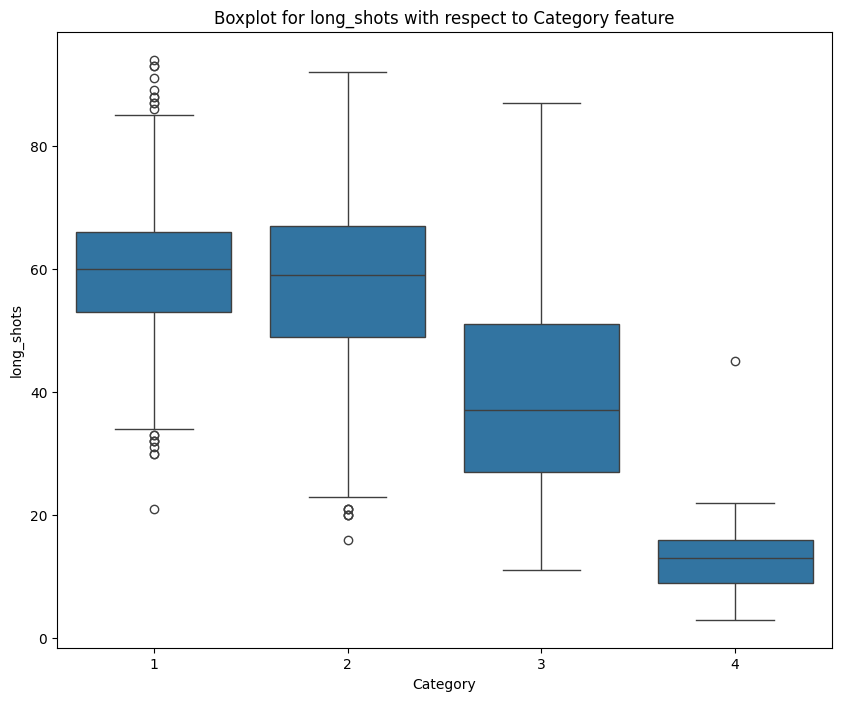

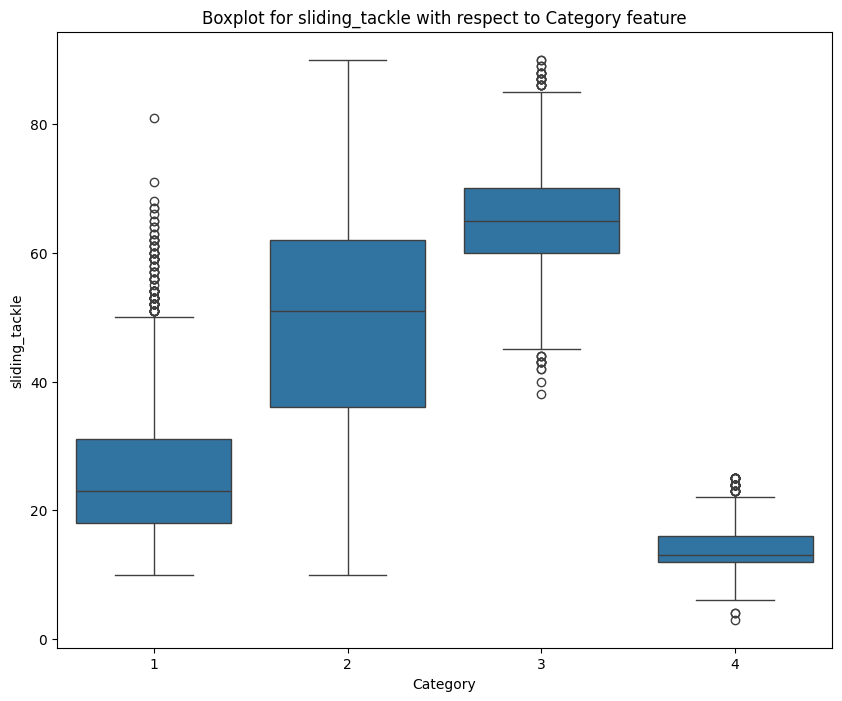

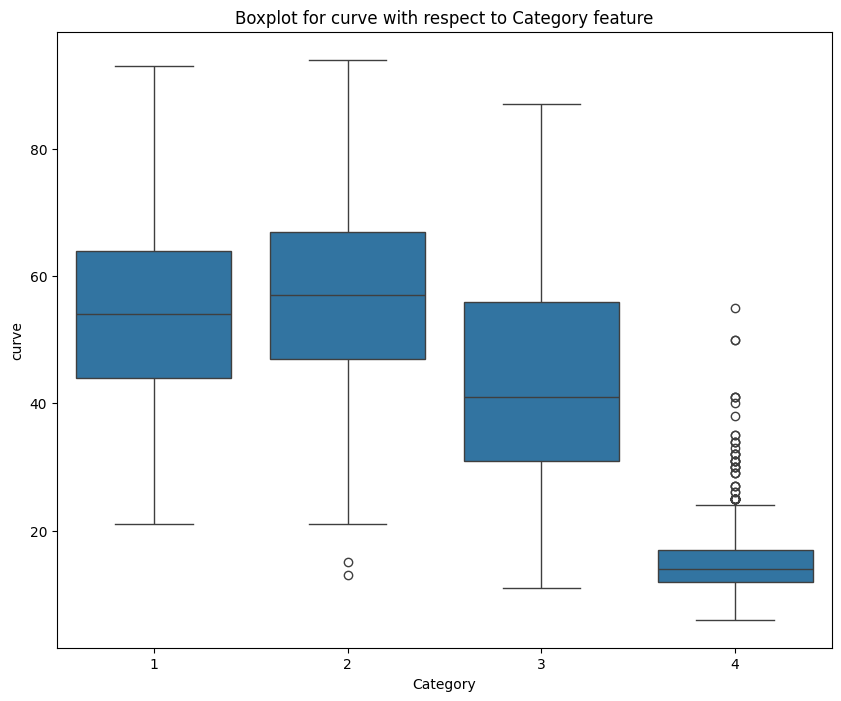

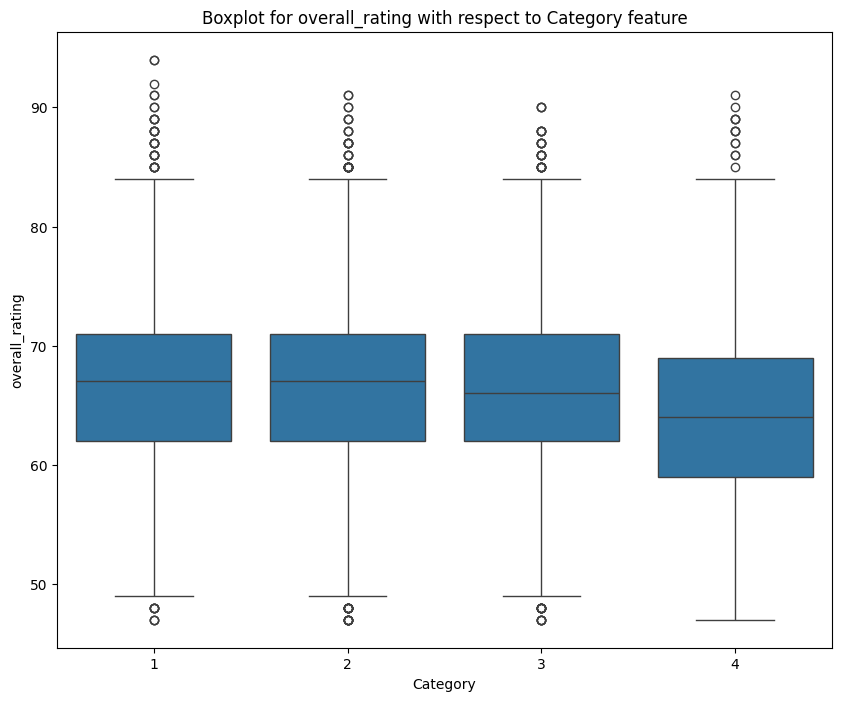

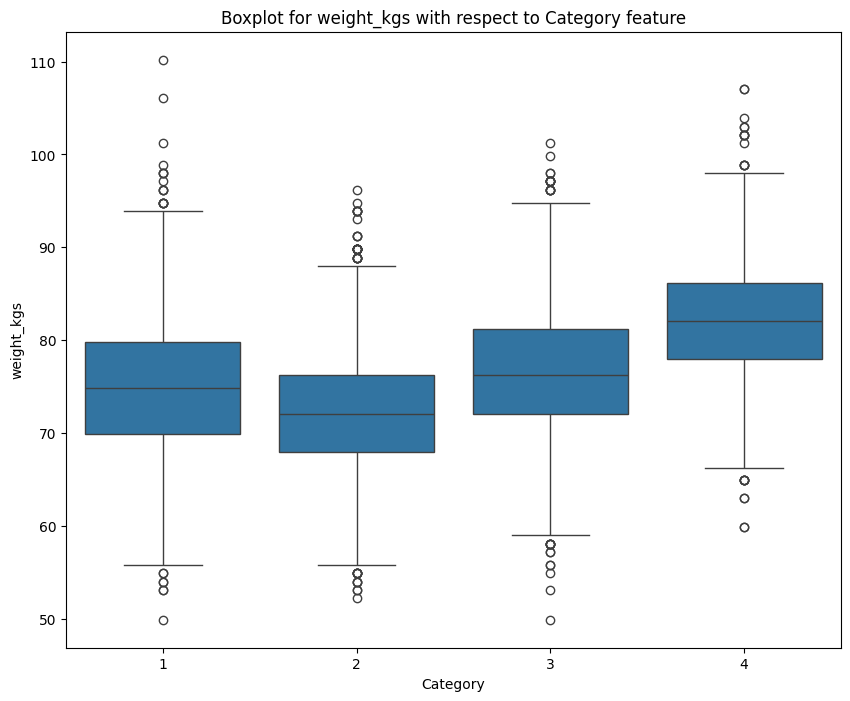

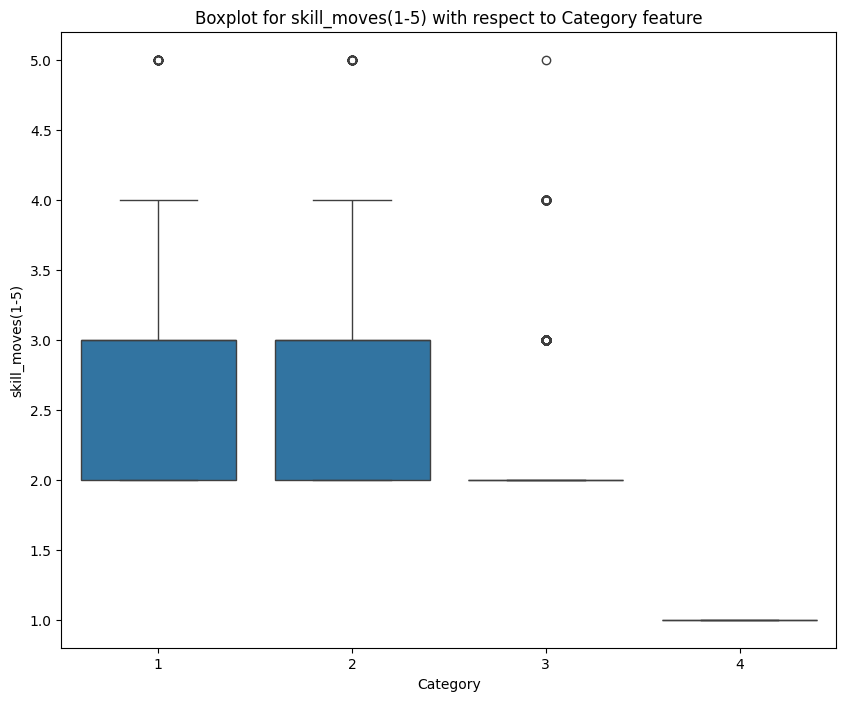

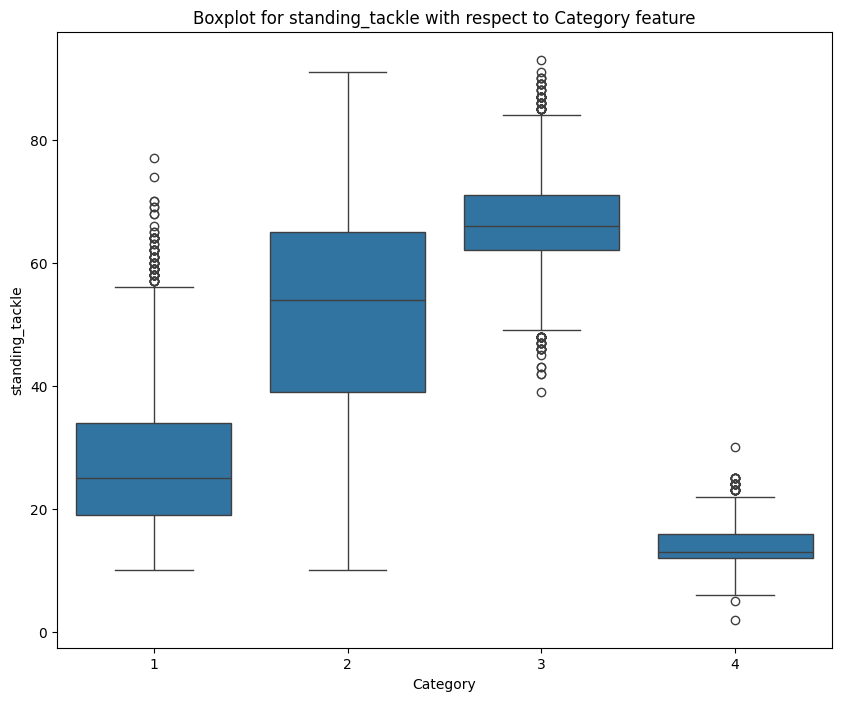

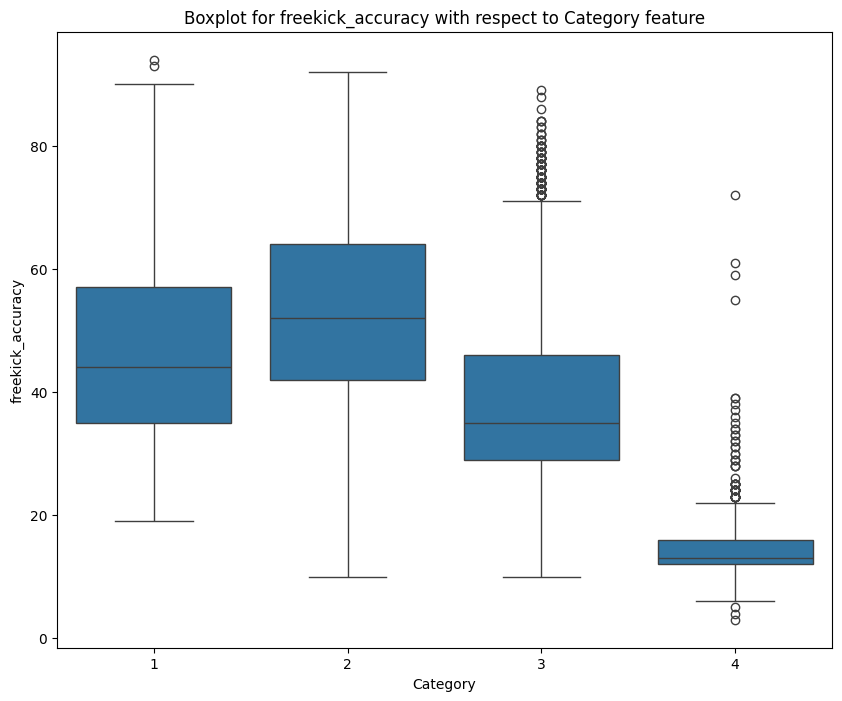

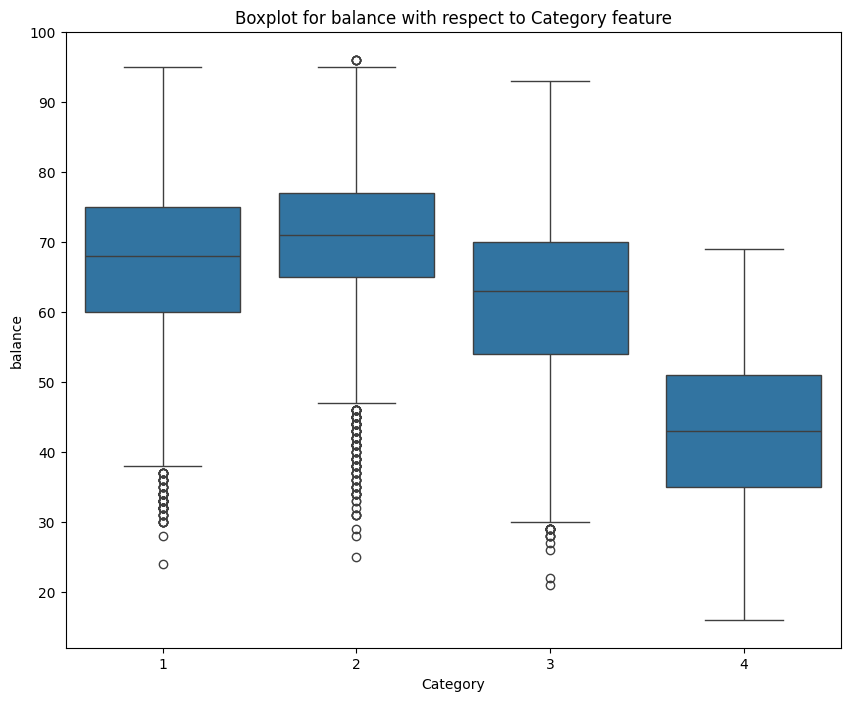

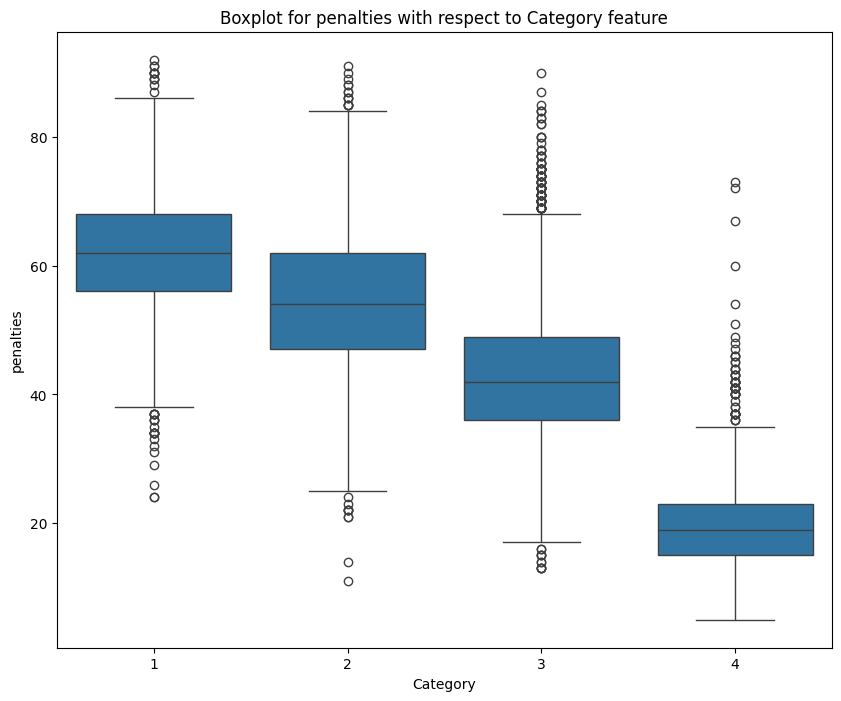

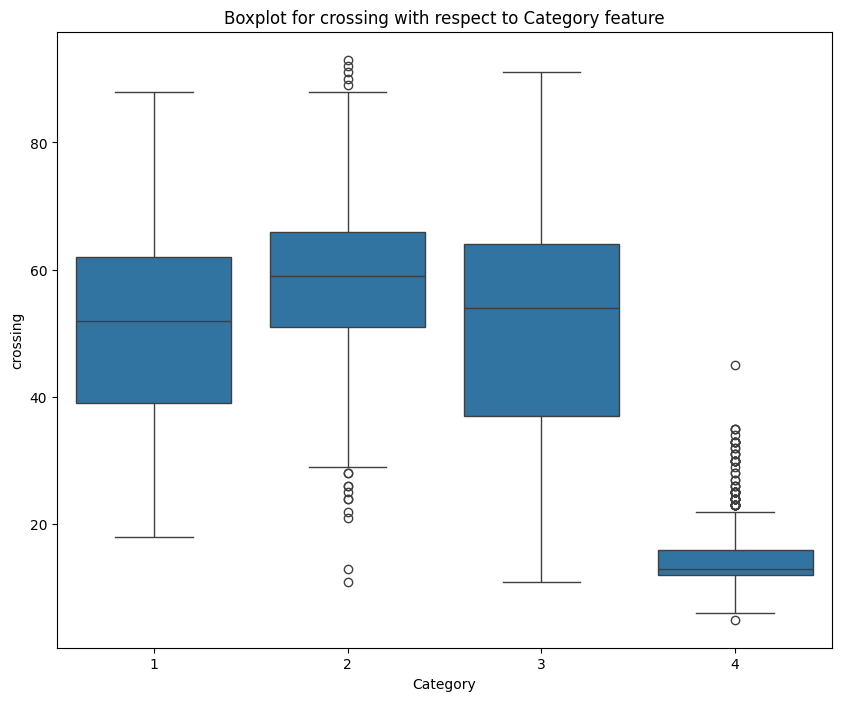

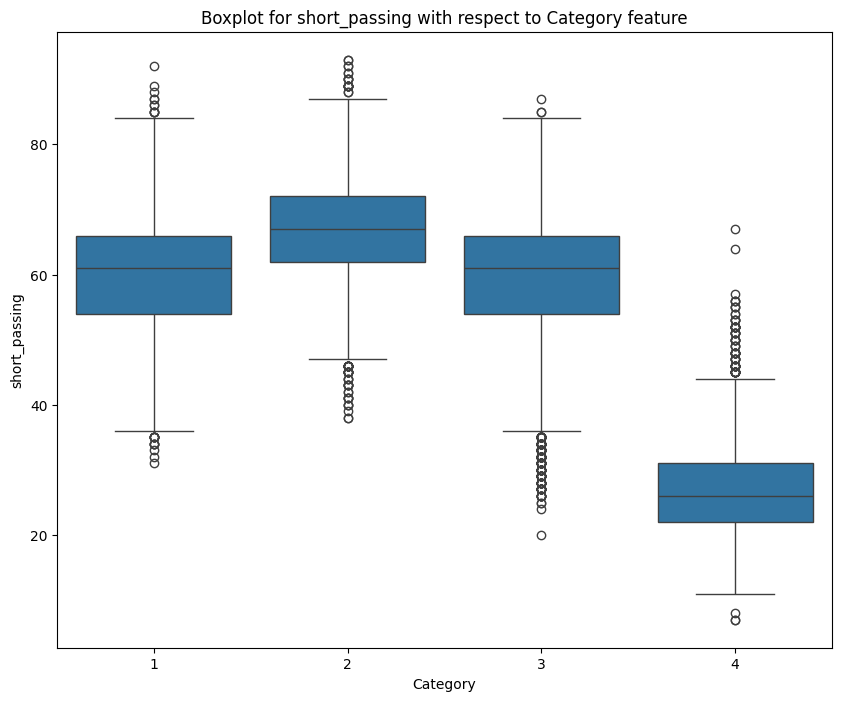

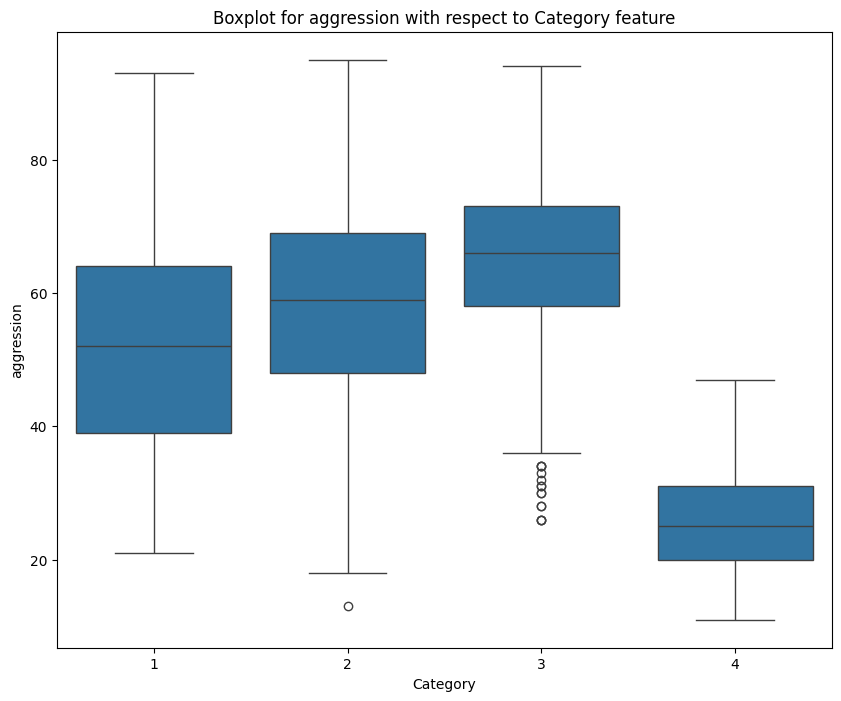

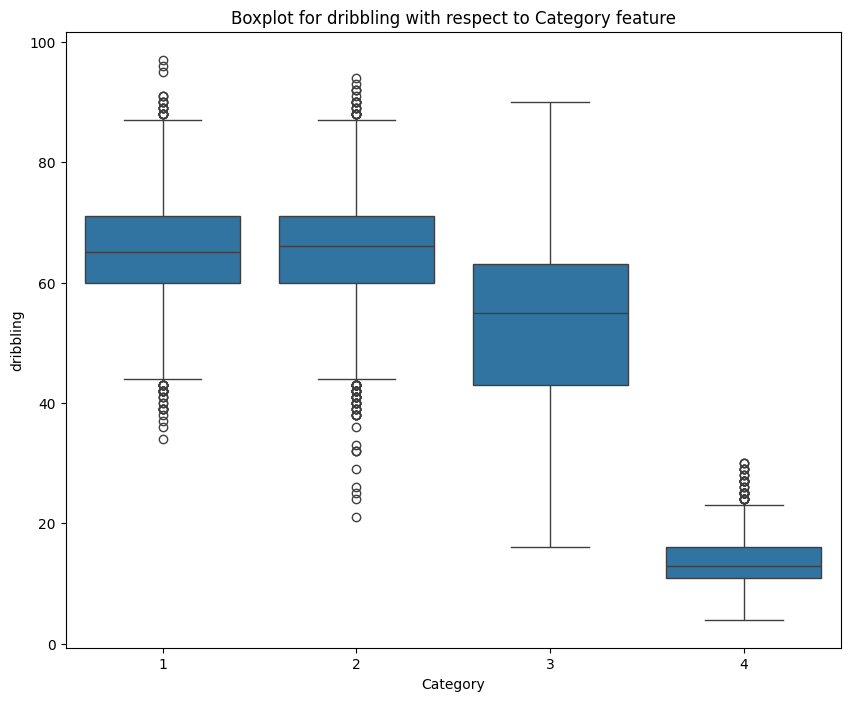

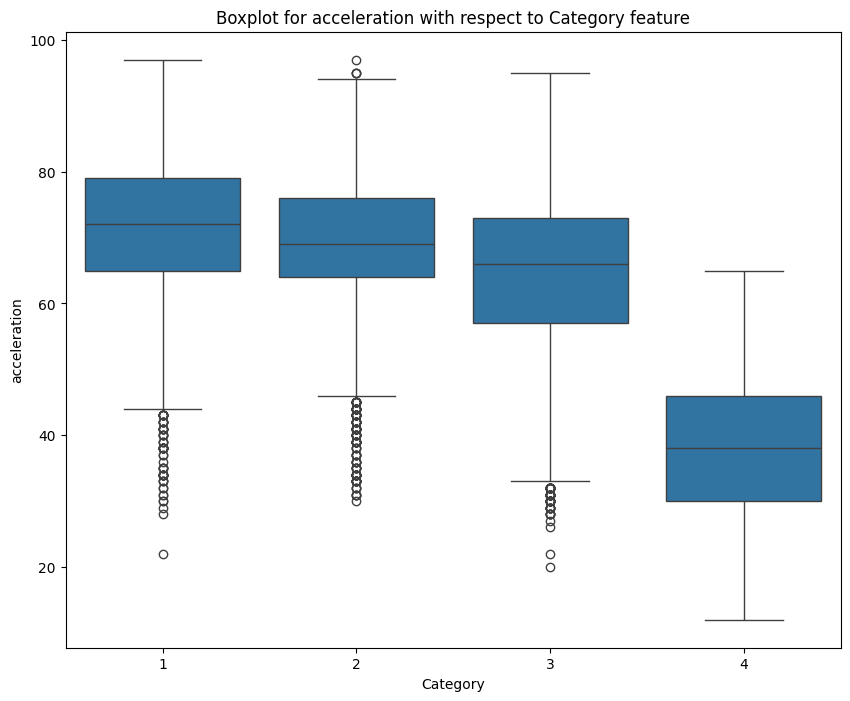

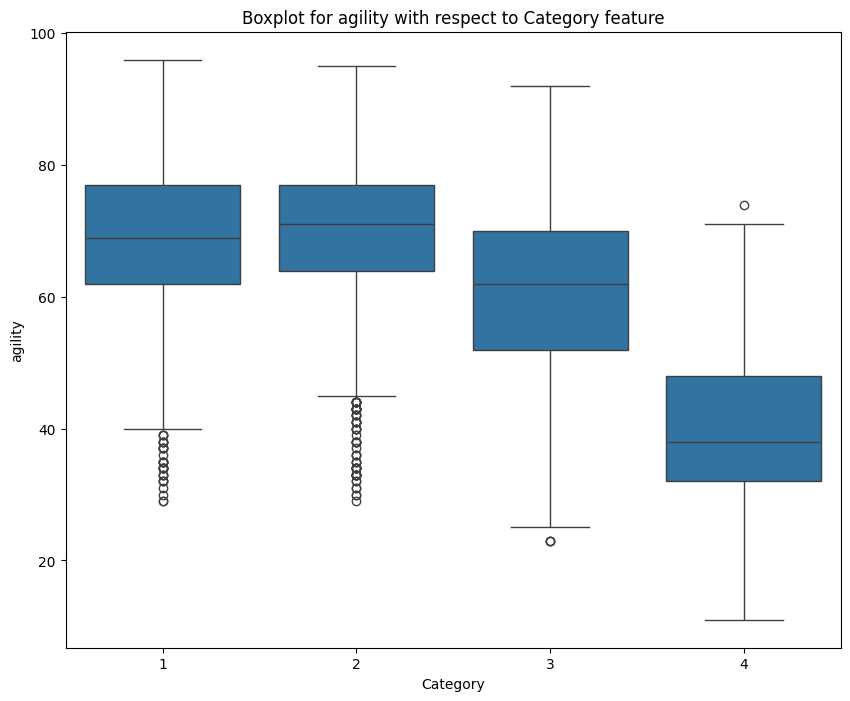

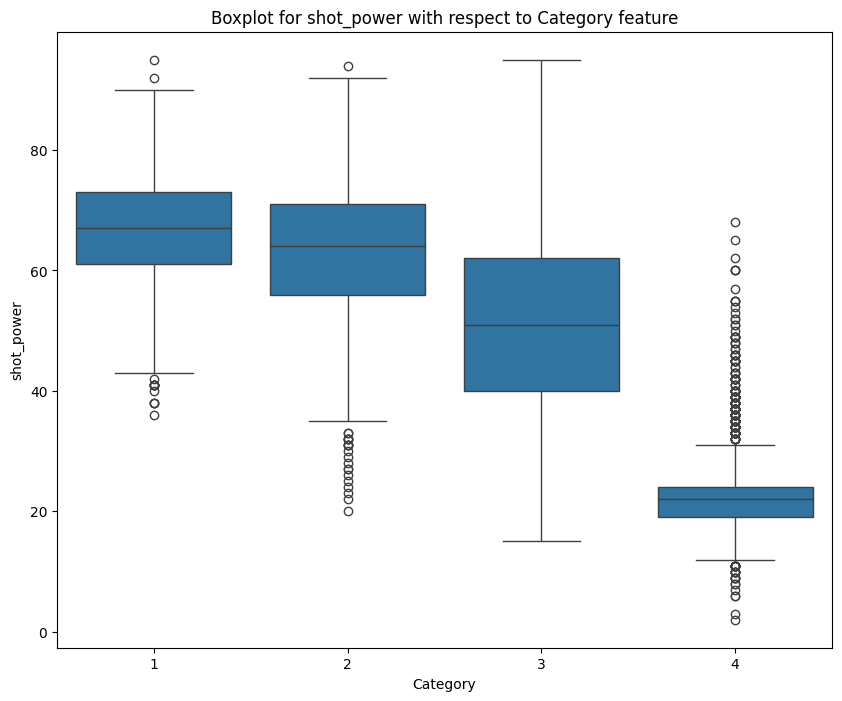

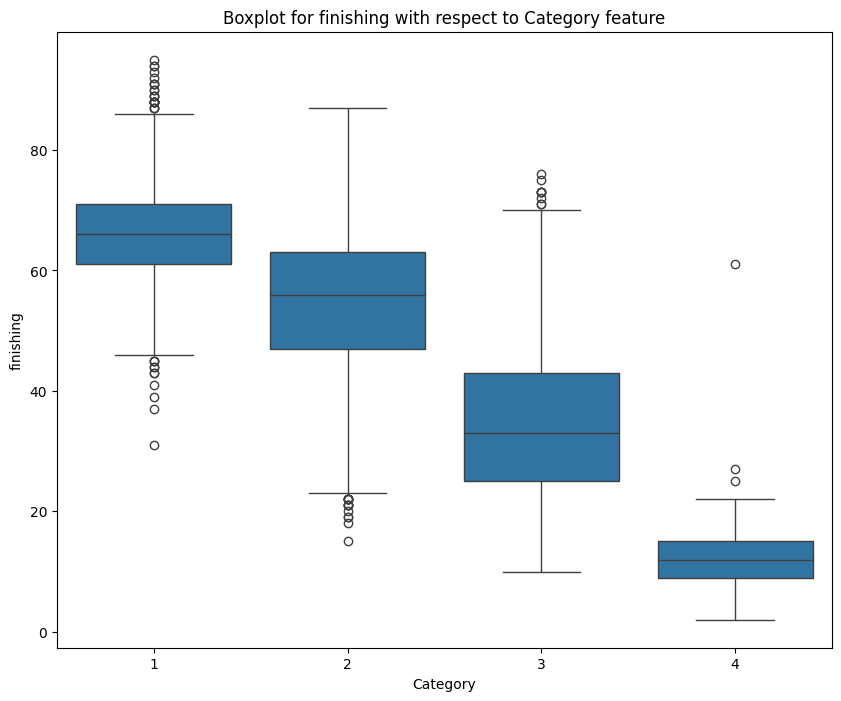

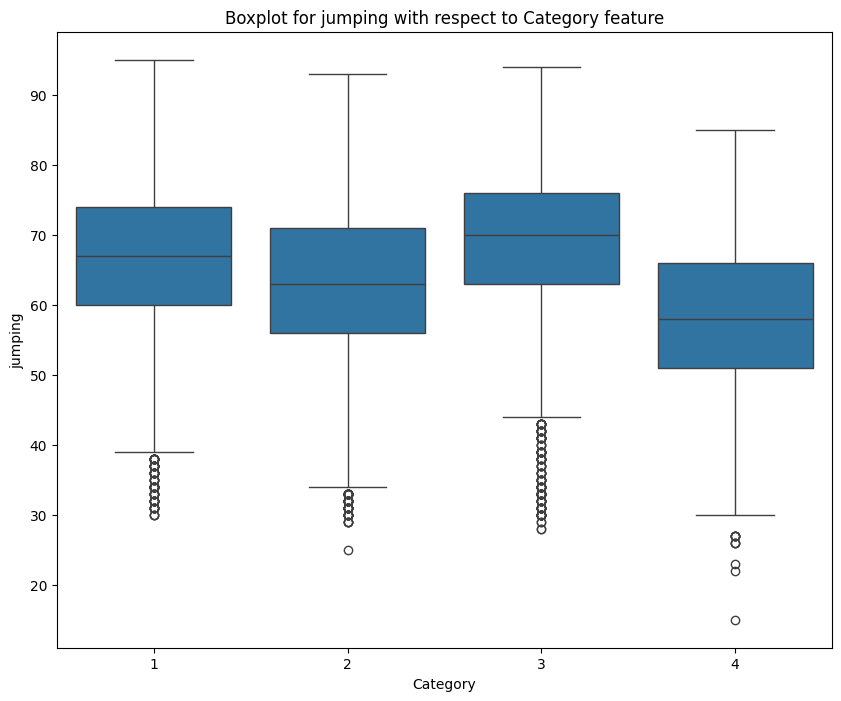

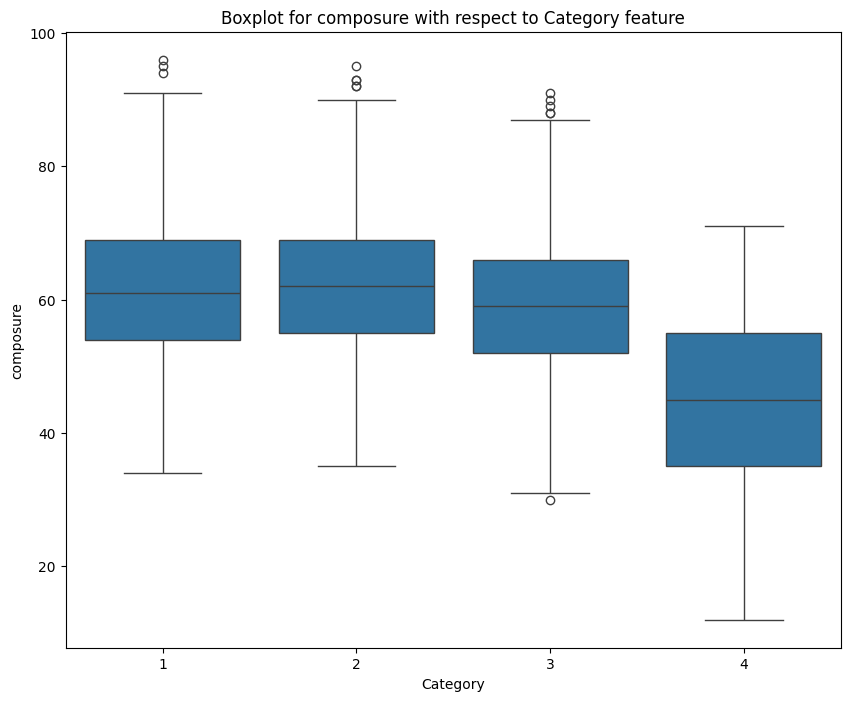

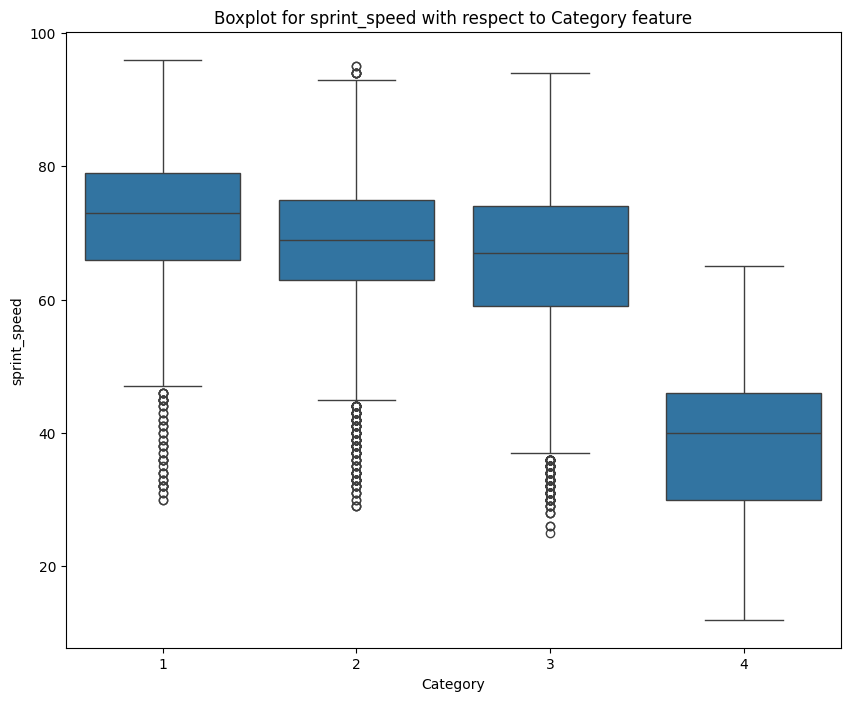

In [314]:
columns_notype = set(df.columns) - set(['name','full_name','age','positions',
                                        'potential', 'preferred_foot', 
                                        'weak_foot', 'body_type','nationality'
                                        ,'value_euro','wage_euro','international_reputation(1-5)'
                                        ,'birth_date','class'])
columns_notype = list(columns_notype)


for col in columns_notype:
    plt.figure(figsize=(10, 8))
    sns.boxplot(df, x = 'Category', y = col)
    plt.title("Boxplot for " + col + " with respect to Category feature")
    plt.show()
    plt.close()

In [315]:
outlier_info = {}

for cls in range(10):
    outlier_info[cls] = {}
    
    
    class_data = df[df['overall_rating'] == cls]
    
    
    for column in columns_notype:
        if column == 'overall_rating':
            continue  # Skip the class column

        
        Q1 = class_data[column].quantile(0.25)
        Q3 = class_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = class_data[(class_data[column] < lower_bound) | (class_data[column] > upper_bound)]
        
        
        outlier_info[cls][column] = {
            'count': len(outliers),
            'values': outliers[column].tolist()
        }

print("outlier_info is saved")

outlier_info is saved


In [316]:
os.makedirs('dumps', exist_ok=True)


with open('dumps/outliers_info.txt', 'w') as file:
    for cls, features in outlier_info.items():
        file.write(f"Class: {cls}\n")
        for feature, info in features.items():
            file.write(f"  Feature: {feature}\n")
            file.write(f"    Outliers Count: {info['count']}\n")
            file.write(f"    Outlier Values: {info['values']}\n\n")

print("Outlier information exported to 'dumps/outliers_info.txt'")

Outlier information exported to 'dumps/outliers_info.txt'


# Data Precrocessing


#### Variable delcaration

In [317]:
print(df.columns)

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'Category'],
      dtype='object')


In [318]:
X = df.drop("overall_rating", axis=1)
y = df["overall_rating"]

numeric_features = list(set(df.columns) - set(['name','full_name','age','positions',
                                        'potential', 'preferred_foot', 
                                        'weak_foot', 'body_type','nationality'
                                        ,'value_euro','wage_euro','international_reputation(1-5)'
                                        ,'birth_date',"overall_rating",'height_cm','weight_kgs', 'Category',
                                        'height_cm', 'weight_kg']))

numeric_features

['strength',
 'heading_accuracy',
 'vision',
 'ball_control',
 'weak_foot(1-5)',
 'interceptions',
 'reactions',
 'positioning',
 'volleys',
 'marking',
 'stamina',
 'long_passing',
 'long_shots',
 'sliding_tackle',
 'curve',
 'skill_moves(1-5)',
 'standing_tackle',
 'freekick_accuracy',
 'balance',
 'penalties',
 'crossing',
 'short_passing',
 'aggression',
 'dribbling',
 'acceleration',
 'agility',
 'shot_power',
 'finishing',
 'jumping',
 'composure',
 'sprint_speed']

#### MinMax Scaling

In [319]:
scaler = MinMaxScaler()
cleaned_df = scaler.fit_transform(df[numeric_features])
cleaned_df = pd.DataFrame(df[numeric_features])
normalized_df = pd.concat([df[numeric_features],y], axis=1)

In [320]:
normalized_df.head()

,strength,heading_accuracy,vision,ball_control,weak_foot(1-5),interceptions,reactions,positioning,volleys,marking,...,aggression,dribbling,acceleration,agility,shot_power,finishing,jumping,composure,sprint_speed,overall_rating
0,66,70,94,96,4,22,95,94,86,33,...,48,97,91,93,85,95,68,96,86,94
1,58,52,91,91,5,56,88,84,80,59,...,46,84,76,80,84,81,50,88,73,88
2,87,75,88,90,4,64,82,82,85,63,...,78,87,71,76,90,75,83,87,79,88
3,44,56,87,93,4,26,83,83,74,51,...,34,90,94,94,75,77,53,83,86,88
4,94,83,49,63,3,88,82,24,14,91,...,87,69,70,50,55,22,81,80,75,88


# Exploratory Data Analysis

In [321]:
normalized_df.isnull().sum()

strength             0
heading_accuracy     0
vision               0
ball_control         0
weak_foot(1-5)       0
interceptions        0
reactions            0
positioning          0
volleys              0
marking              0
stamina              0
long_passing         0
long_shots           0
sliding_tackle       0
curve                0
skill_moves(1-5)     0
standing_tackle      0
freekick_accuracy    0
balance              0
penalties            0
crossing             0
short_passing        0
aggression           0
dribbling            0
acceleration         0
agility              0
shot_power           0
finishing            0
jumping              0
composure            0
sprint_speed         0
overall_rating       0
dtype: int64

In [322]:
normalized_df.info()

correlation_matrix = normalized_df[normalized_df.columns[1:]].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

<class 'pandas.core.frame.DataFrame'>
Index: 17699 entries, 0 to 17953
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   strength           17699 non-null  int64
 1   heading_accuracy   17699 non-null  int64
 2   vision             17699 non-null  int64
 3   ball_control       17699 non-null  int64
 4   weak_foot(1-5)     17699 non-null  int64
 5   interceptions      17699 non-null  int64
 6   reactions          17699 non-null  int64
 7   positioning        17699 non-null  int64
 8   volleys            17699 non-null  int64
 9   marking            17699 non-null  int64
 10  stamina            17699 non-null  int64
 11  long_passing       17699 non-null  int64
 12  long_shots         17699 non-null  int64
 13  sliding_tackle     17699 non-null  int64
 14  curve              17699 non-null  int64
 15  skill_moves(1-5)   17699 non-null  int64
 16  standing_tackle    17699 non-null  int64
 17  freekick_accuracy

C:\Users\lumag\AppData\Local\Temp\ipykernel_3520\4141025164.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")


,heading_accuracy,vision,ball_control,weak_foot(1-5),interceptions,reactions,positioning,volleys,marking,stamina,...,aggression,dribbling,acceleration,agility,shot_power,finishing,jumping,composure,sprint_speed,overall_rating
heading_accuracy,1.000,0.284,0.669,0.190,0.560,0.340,0.544,0.516,0.593,0.649,...,0.706,0.564,0.353,0.279,0.617,0.482,0.390,0.526,0.403,0.349
vision,0.284,1.000,0.720,0.343,0.190,0.514,0.739,0.702,0.189,0.482,...,0.311,0.731,0.469,0.601,0.685,0.703,0.066,0.646,0.438,0.508
ball_control,0.669,0.720,1.000,0.360,0.431,0.454,0.869,0.799,0.468,0.743,...,0.565,0.942,0.690,0.712,0.836,0.794,0.207,0.692,0.679,0.466
weak_foot(1-5),0.190,0.343,0.360,1.000,0.057,0.205,0.354,0.363,0.068,0.241,...,0.137,0.357,0.270,0.306,0.340,0.368,0.071,0.285,0.258,0.216
interceptions,0.560,0.190,0.431,0.057,1.000,0.346,0.188,0.101,0.896,0.589,...,0.754,0.313,0.175,0.155,0.277,-0.004,0.300,0.411,0.189,0.323
reactions,0.340,0.514,0.454,0.205,0.346,1.000,0.395,0.402,0.297,0.382,...,0.412,0.381,0.202,0.289,0.428,0.343,0.267,0.693,0.206,0.857
positioning,0.544,0.739,0.869,0.354,0.188,0.395,1.000,0.852,0.221,0.657,...,0.402,0.902,0.694,0.715,0.814,0.890,0.150,0.596,0.678,0.363
volleys,0.516,0.702,0.799,0.363,0.101,0.402,0.852,1.000,0.136,0.542,...,0.345,0.812,0.583,0.631,0.836,0.886,0.132,0.607,0.568,0.397
marking,0.593,0.189,0.468,0.068,0.896,0.297,0.221,0.136,1.000,0.603,...,0.729,0.354,0.219,0.187,0.311,0.042,0.291,0.405,0.237,0.294
stamina,0.649,0.482,0.743,0.241,0.589,0.382,0.657,0.542,0.603,1.000,...,0.661,0.702,0.626,0.585,0.629,0.527,0.357,0.543,0.638,0.370


## 1. Are there any correlations within the dataset

In [323]:
drop_features = list(set(df.columns) - set(['name','full_name','age','positions',
                                        'potential', 'preferred_foot', 
                                        'weak_foot', 'body_type','nationality'
                                        ,'value_euro','wage_euro','international_reputation(1-5)'
                                        ,'birth_date',"overall_rating",'height_cm','weight_kgs',
                                        'height_cm', 'weight_kg']))

eda_df = 

SyntaxError: invalid syntax (288730964.py, line 8)

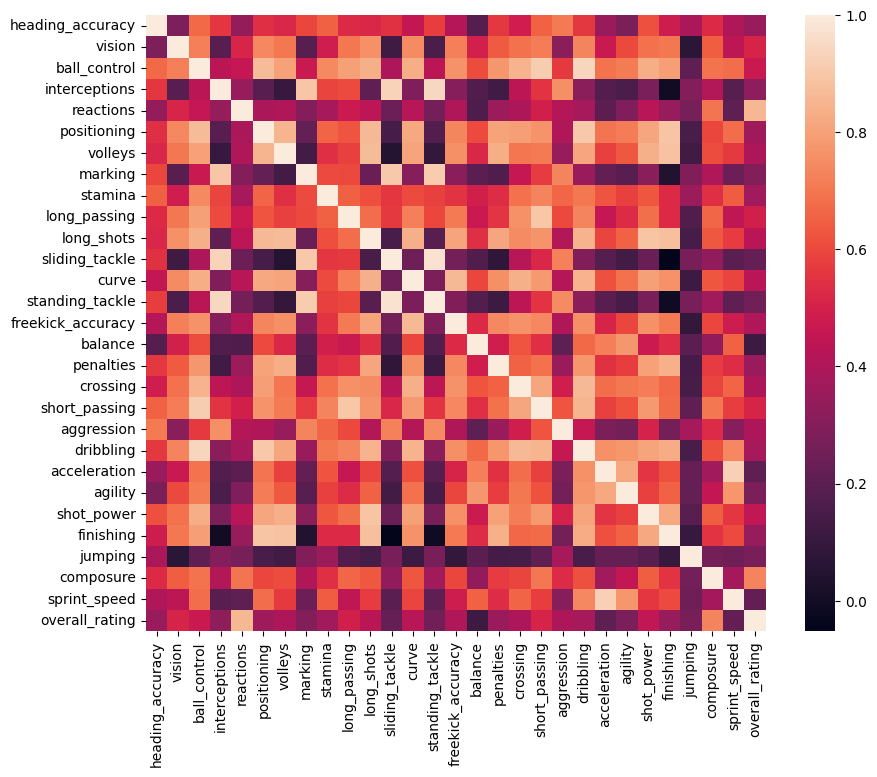

In [ ]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, fmt=".3f")

In [ ]:
unf = correlation_matrix.unstack()
so = unf.sort_values(kind="quicksort").drop_duplicates()
so = so[::-1]
so[1:20]

sliding_tackle   standing_tackle      0.975102
standing_tackle  interceptions        0.943123
dribbling        ball_control         0.941555
sliding_tackle   interceptions        0.930480
sprint_speed     acceleration         0.925894
ball_control     short_passing        0.915211
standing_tackle  marking              0.911605
positioning      dribbling            0.901588
sliding_tackle   marking              0.901557
long_passing     short_passing        0.898308
marking          interceptions        0.895978
long_shots       shot_power           0.892222
finishing        positioning          0.890102
                 volleys              0.886443
                 long_shots           0.879896
volleys          long_shots           0.871016
ball_control     positioning          0.869346
long_shots       positioning          0.863768
curve            freekick_accuracy    0.861877
dtype: float64

In [ ]:
unf = correlation_matrix.unstack()
so = unf.sort_values(kind="quicksort").drop_duplicates()
so = so[:20] 
so


finishing          sliding_tackle    -0.052022
                   standing_tackle   -0.013521
interceptions      finishing         -0.003940
marking            finishing          0.042289
sliding_tackle     volleys            0.050077
vision             jumping            0.066374
penalties          sliding_tackle     0.083021
freekick_accuracy  jumping            0.087731
volleys            standing_tackle    0.087741
                   interceptions      0.101241
jumping            finishing          0.102078
overall_rating     balance            0.114506
curve              jumping            0.115736
standing_tackle    penalties          0.117834
sliding_tackle     vision             0.121383
interceptions      penalties          0.125498
volleys            jumping            0.131557
sliding_tackle     agility            0.134807
volleys            marking            0.136169
penalties          jumping            0.140918
dtype: float64

### 2. How is the data distributed?

#### 2a. How is the general distribution of data?

In [ ]:
categorical_data = ["weak_foot(1-5)","skill_moves(1-5)", 'Category']

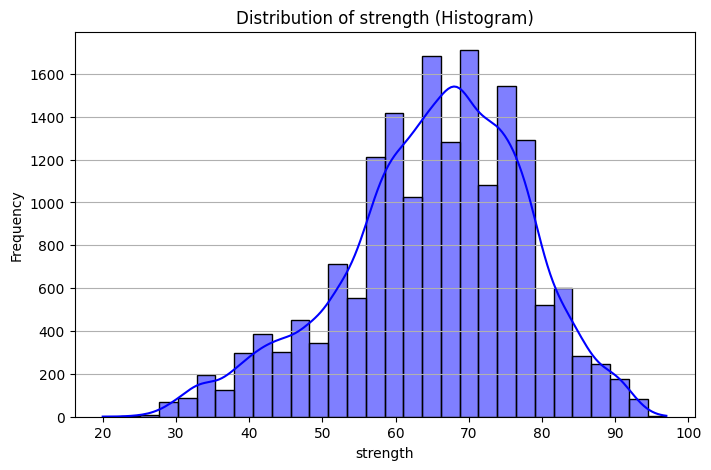

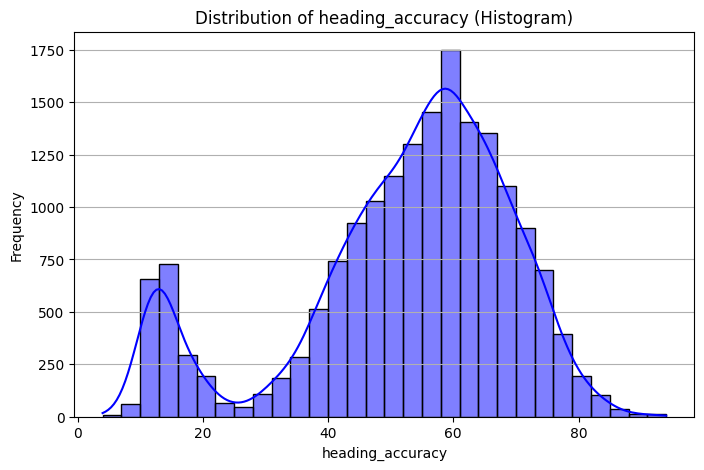

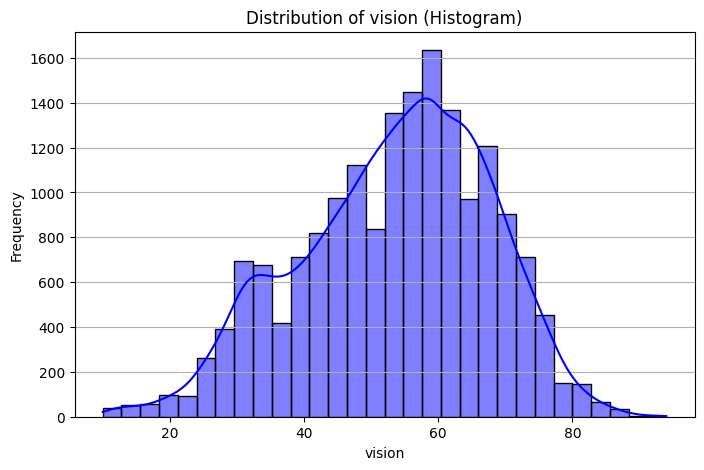

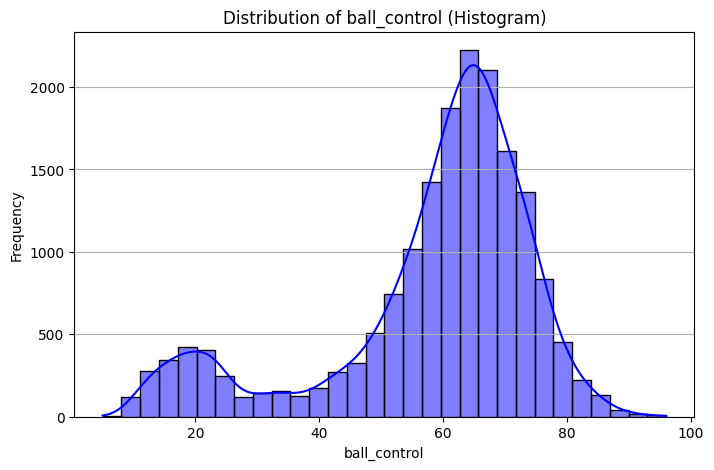

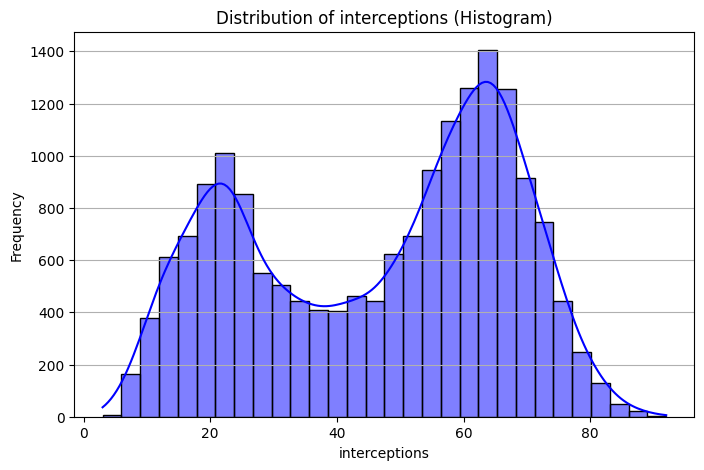

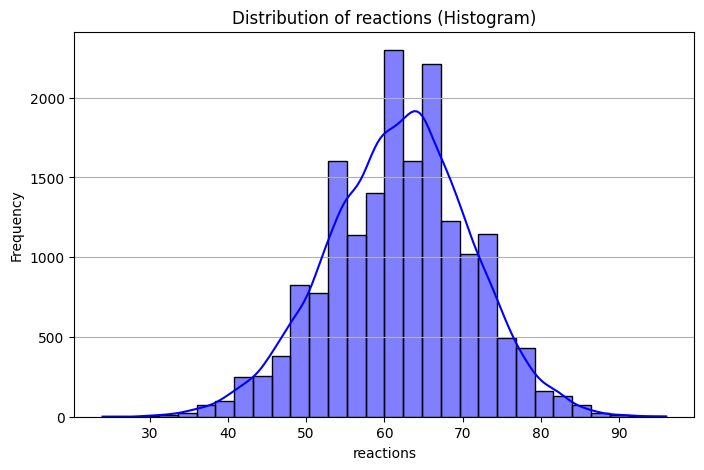

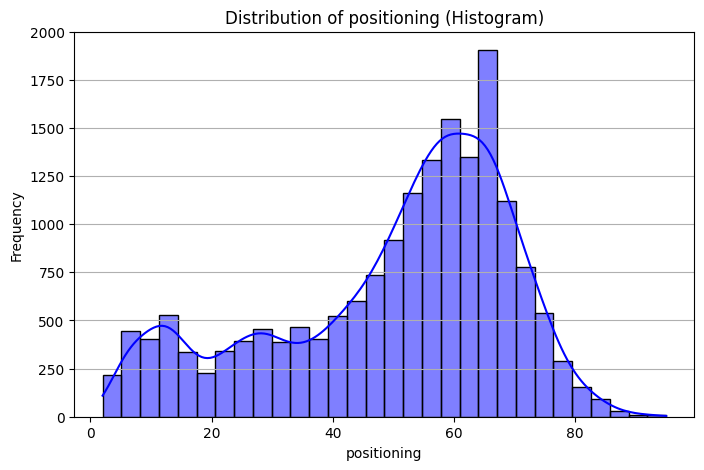

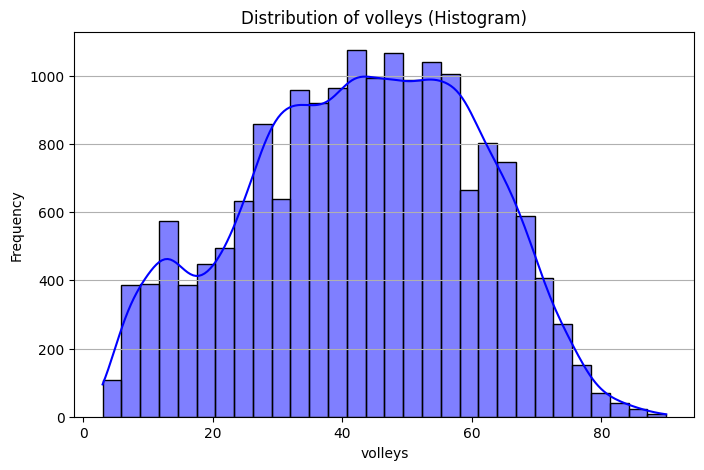

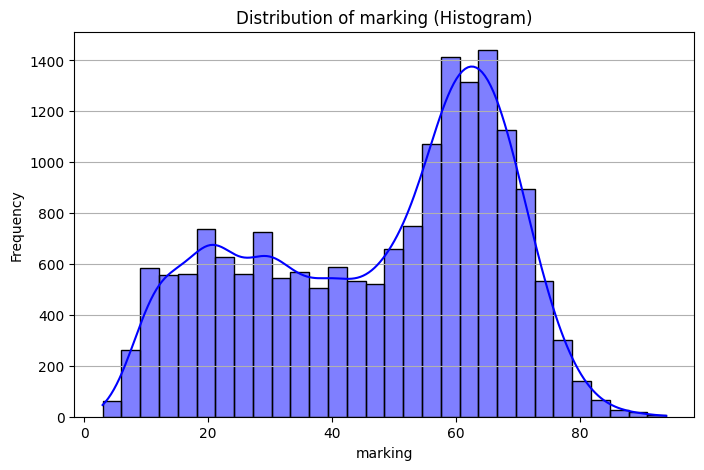

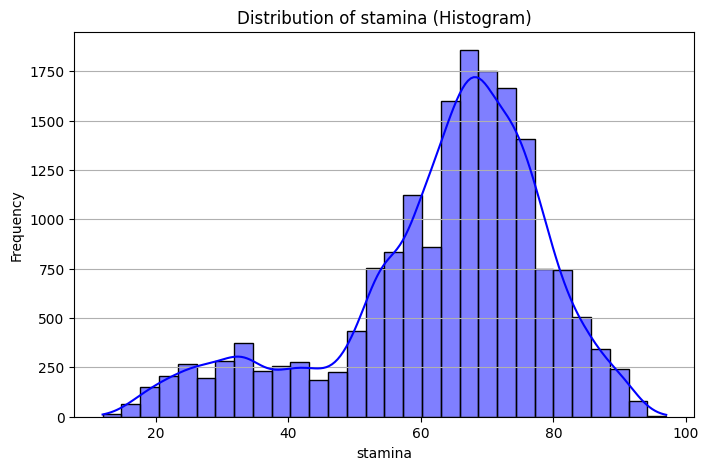

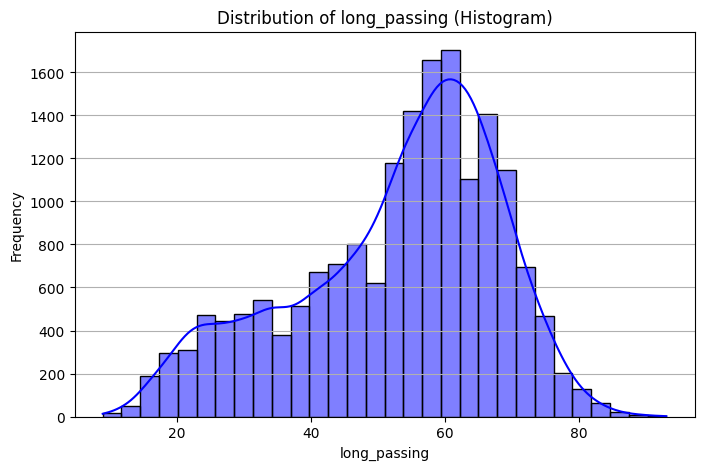

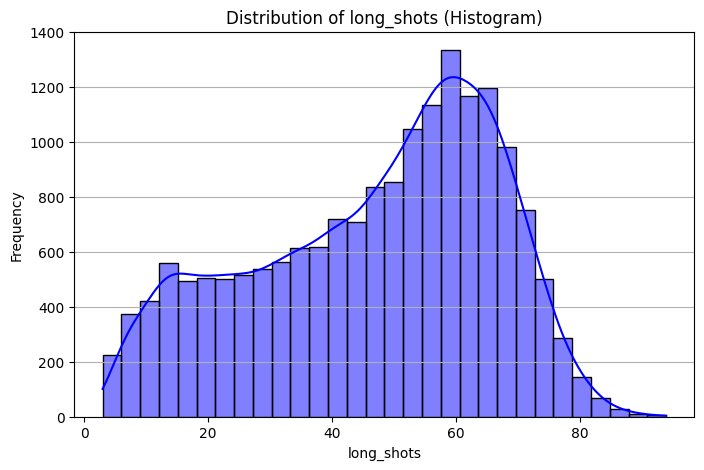

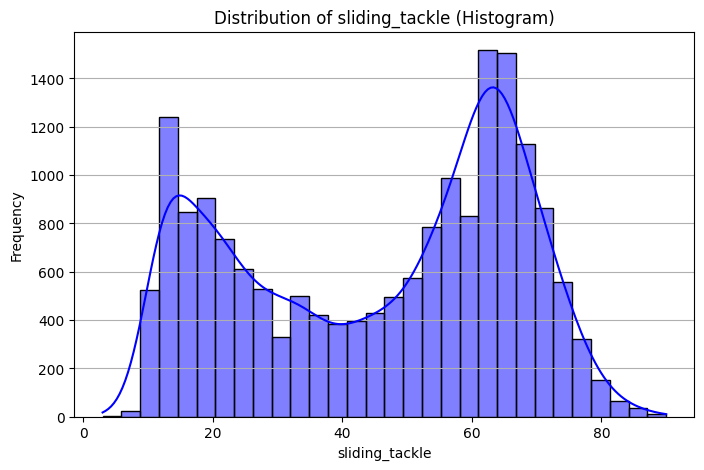

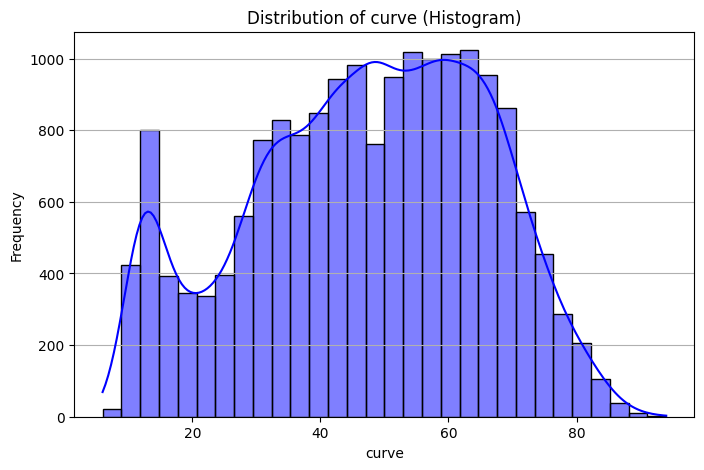

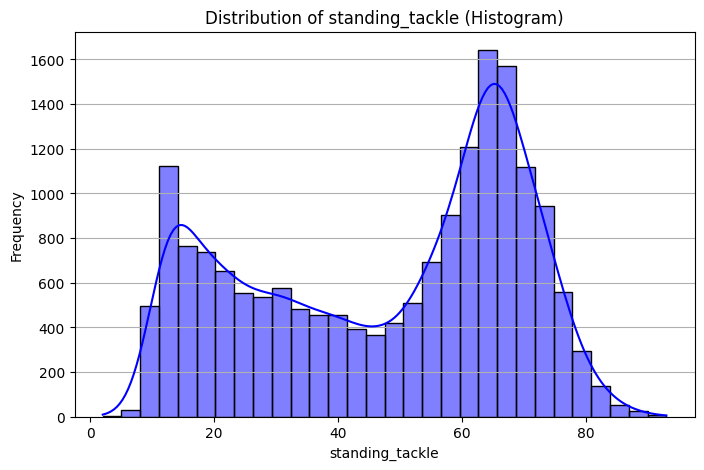

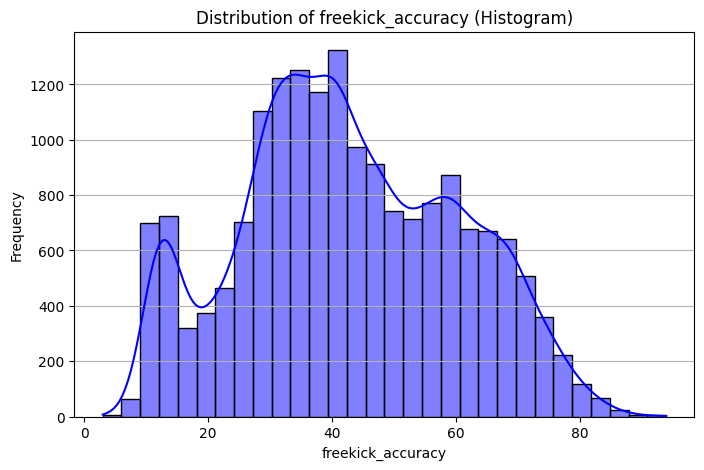

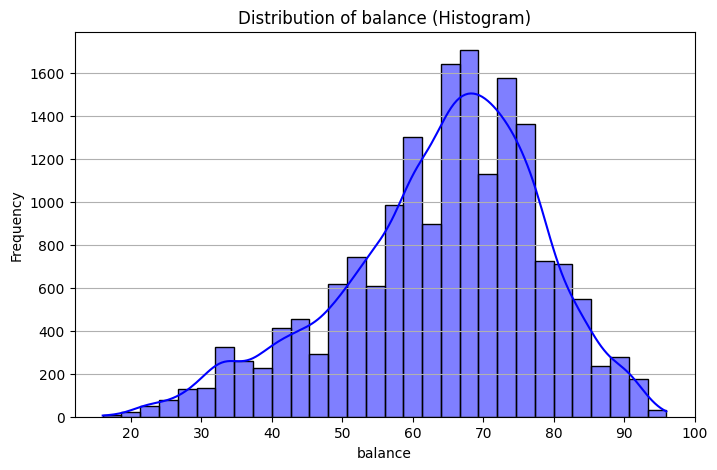

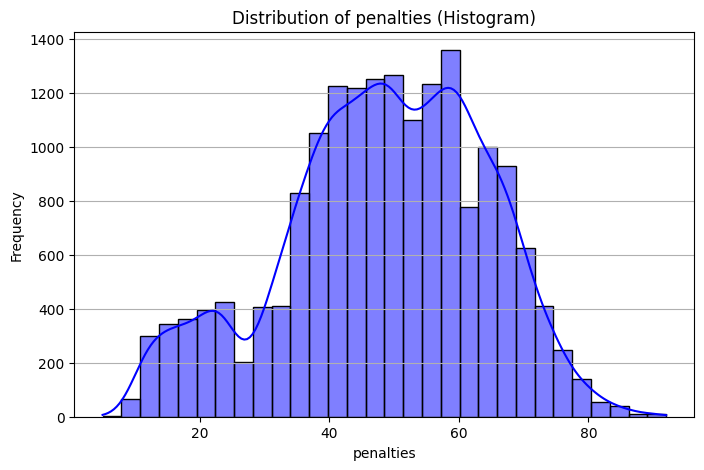

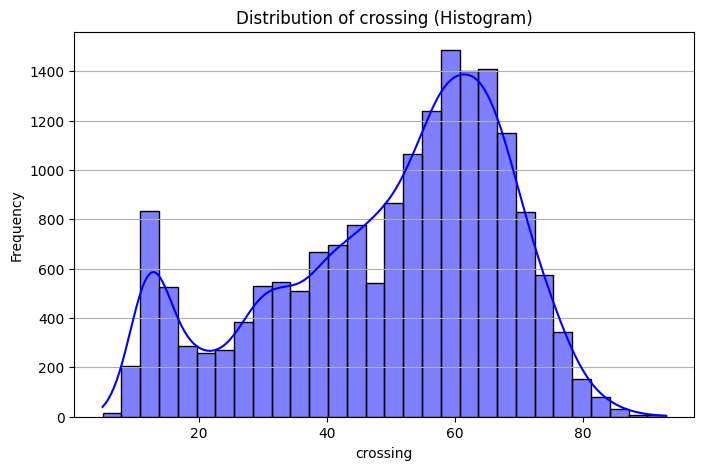

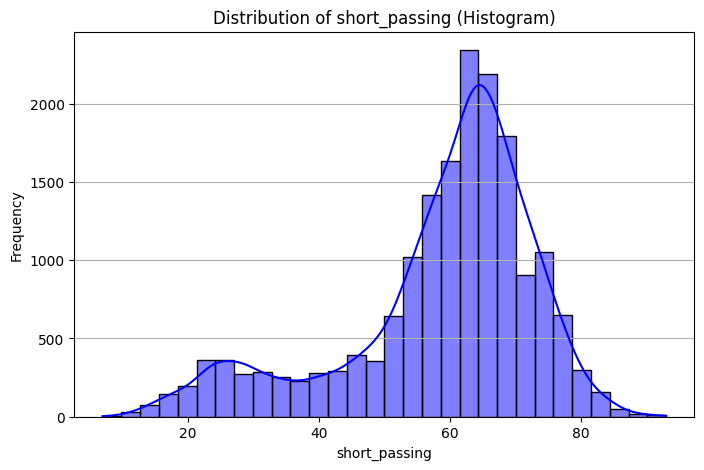

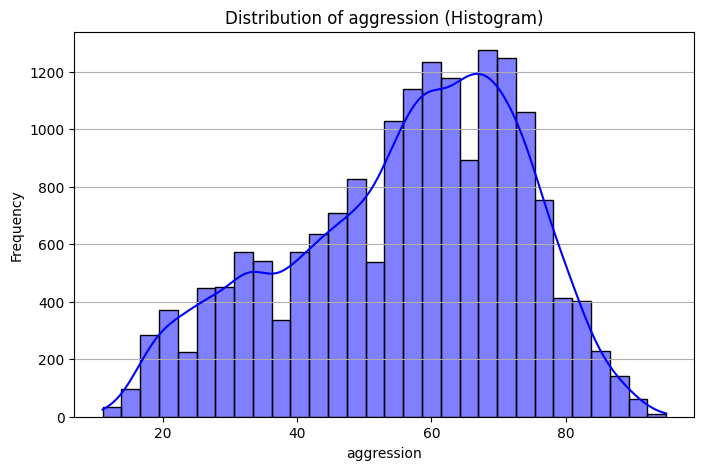

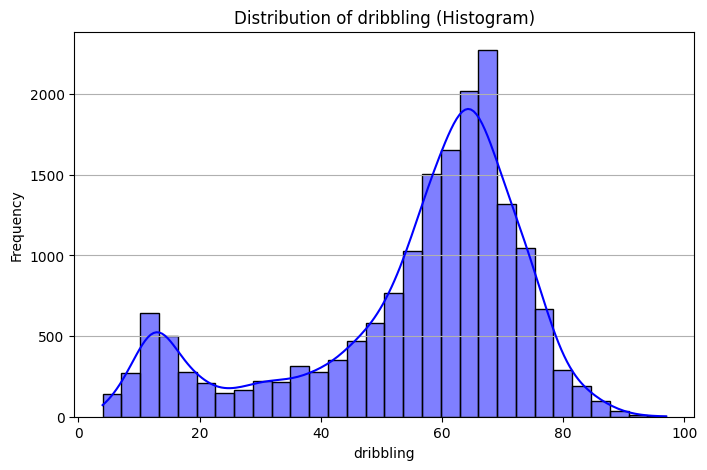

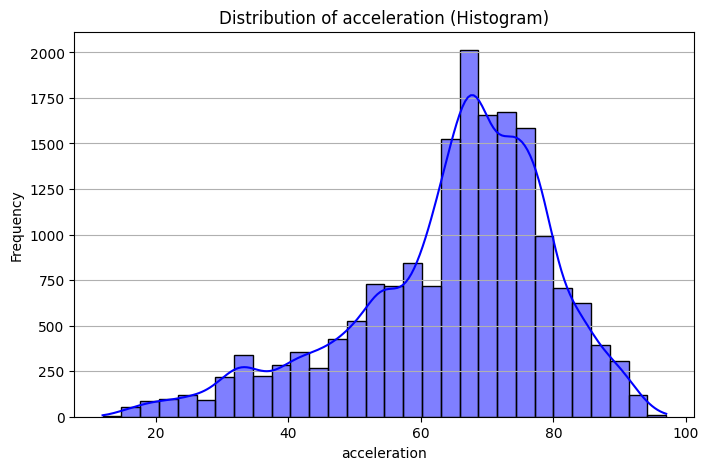

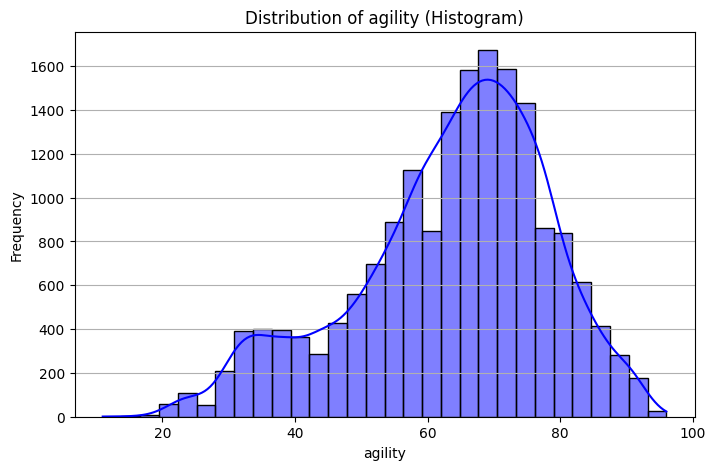

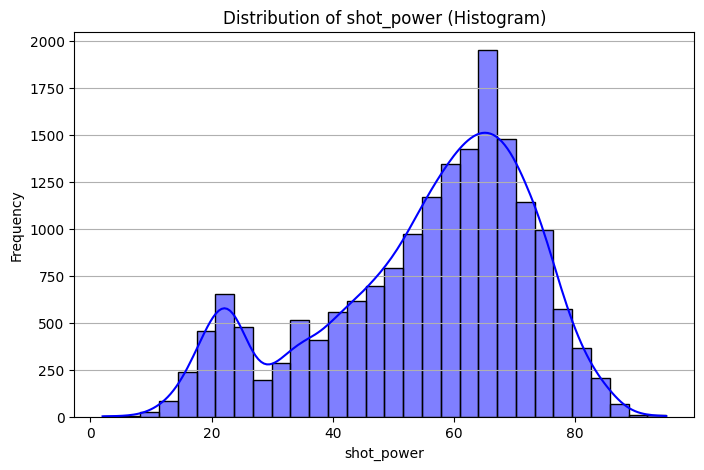

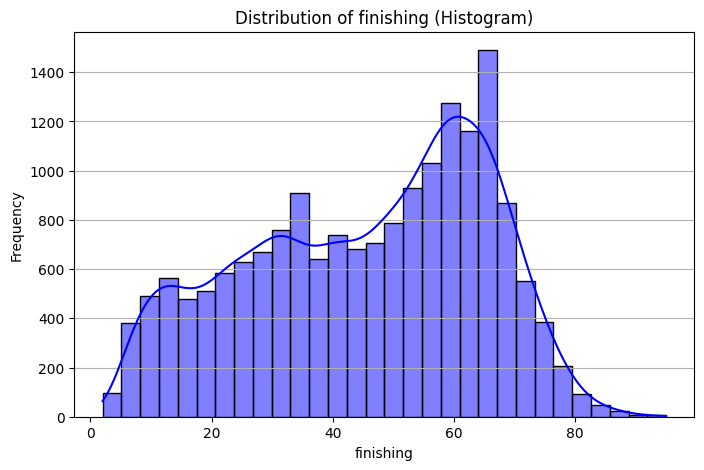

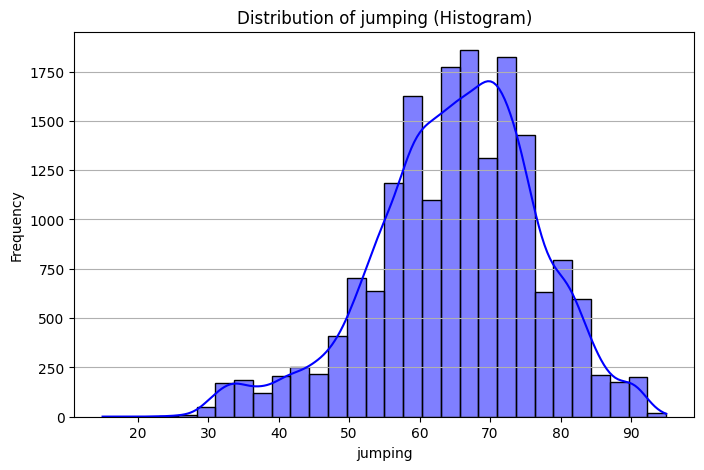

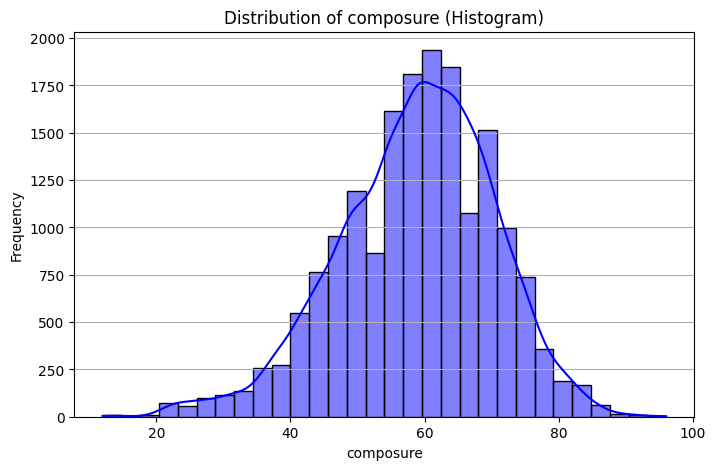

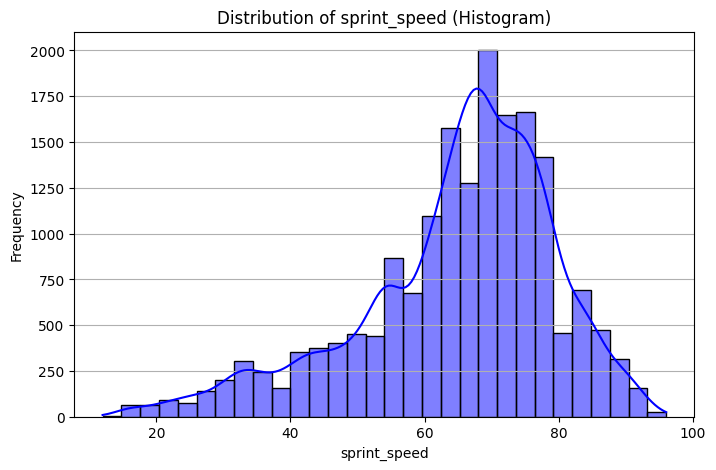

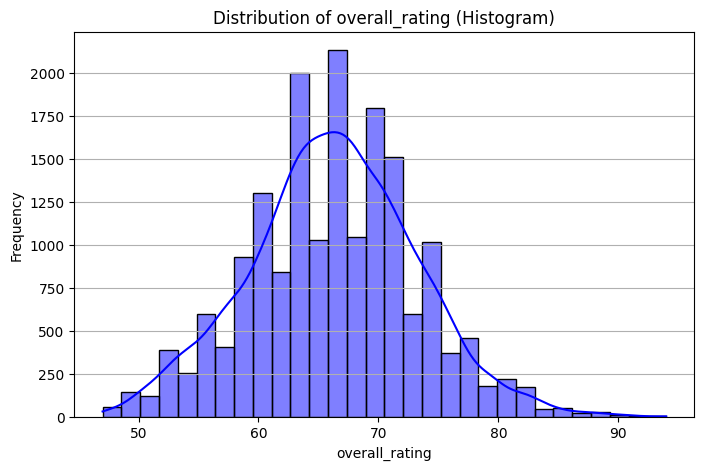

In [ ]:
columns = normalized_df.columns

for column in columns:
    plt.figure(figsize=(8, 5))
    
    if column not in categorical_data:
        # Create a histogram for numeric data
        sns.histplot(normalized_df[column], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {column} (Histogram)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # Create a bar chart for non-numeric data
        normalized_df[column].value_counts().plot(kind='bar', color='blue')
        plt.title(f'Distribution of {column} (Bar Chart)')
        plt.xlabel(column)
        plt.ylabel('Count')
    
    plt.grid(axis='y')
    plt.show()


#### 2b. How is the distribution of data given the class of the player

In [ ]:
category_column = 'Category'

for column in columns:
    plt.figure(figsize=(8, 5))
    
    if column not in categorical_data:
        # Create a histogram for numeric data grouped by the category
        sns.histplot(data=normalized_df, x=column, hue=category_column, kde=True, bins=30, palette='Blues')
        plt.title(f'Distribution of {column} by {category_column} (Histogram)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # Create a bar chart for non-numeric data grouped by the category
        normalized_df.groupby(category_column)[column].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(8, 5))
        plt.title(f'Distribution of {column} by {category_column} (Bar Chart)')
        plt.xlabel(column)
        plt.ylabel('Count')
    
    plt.grid(axis='y')
    plt.show()

ValueError: Could not interpret value `Category` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

# Section 6. Initial model training

## K-Nearest Neighbors Model

TODO: *Insert reason why we use this model here*

Importing relevant libraries

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Creating the train and test datasets using train_test_split. We set test_size to 0.3 as it is a pretty standard test size. We stratify based on y to ensure that the data is split evently between the classes. Shuffle is to help randomize the data for possibly better fitting. Random state set for reproducability.

In [ ]:
X_knn = normalized_df
y_knn = normalized_df.values[:, -2]

Standardize features using MinMaxScaler

In [ ]:
X_knn = MinMaxScaler().fit_transform(X_knn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, stratify=y_knn, random_state=42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)

print(X_train[0])

[0.39130435 0.82255639 0.58916281 0.15946548 0.40208575 0.64094426
 0.74801482 0.13416843 0.44580817 0.34289551]


See train and test split shape

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (8355, 10)
X_test shape:  (3582, 10)


Setup KNN Classifier and start fitting to the training data. For now, we will choose as arbitrary K value and distance metric that doesn't perform too badly

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, metric="euclidean", weights="uniform")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

Test model on training data 

In [ ]:
y_pred_train = knn.predict(X_train)
knn.score(X_train, y_train)

0.4891681627767804

We got a "decent" accuracy on training data, let's check testing accuracy

Now, we test on the test data

In [ ]:
y_pred_test = knn.predict(X_test)
knn.score(X_test, y_test)

0.4276940256839754

We got a similar accuracy on testing data, this means no overfitting or underfitting is occuring. Unfortunately, the accuracies aren't high in general, meaning the model isn't too useful.

Confusion matrix of results

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

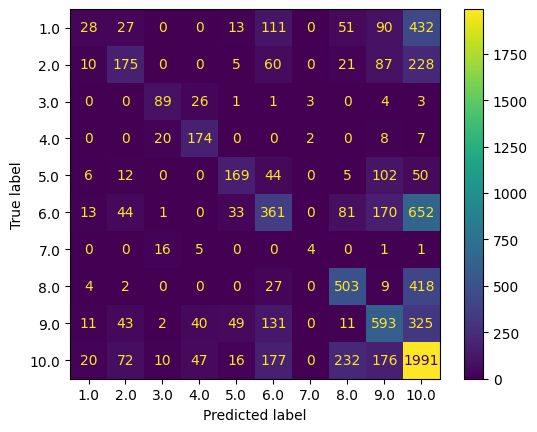

In [ ]:
cm = confusion_matrix(y_train, y_pred_train, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

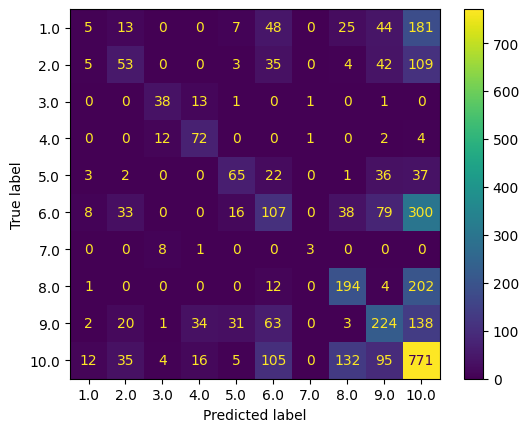

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         1.0       0.30      0.04      0.07       752
         2.0       0.47      0.30      0.36       586
         3.0       0.64      0.70      0.67       127
         4.0       0.60      0.82      0.69       211
         5.0       0.59      0.44      0.50       388
         6.0       0.40      0.27      0.32      1355
         7.0       0.44      0.15      0.22        27
         8.0       0.56      0.52      0.54       963
         9.0       0.48      0.49      0.49      1205
        10.0       0.48      0.73      0.58      2741

    accuracy                           0.49      8355
   macro avg       0.50      0.45      0.44      8355
weighted avg       0.47      0.49      0.46      8355



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         1.0       0.14      0.02      0.03       323
         2.0       0.34      0.21      0.26       251
         3.0       0.60      0.70      0.65        54
         4.0       0.53      0.79      0.63        91
         5.0       0.51      0.39      0.44       166
         6.0       0.27      0.18      0.22       581
         7.0       0.60      0.25      0.35        12
         8.0       0.49      0.47      0.48       413
         9.0       0.43      0.43      0.43       516
        10.0       0.44      0.66      0.53      1175

    accuracy                           0.43      3582
   macro avg       0.43      0.41      0.40      3582
weighted avg       0.39      0.43      0.39      3582



## Testing different hyperparameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [ ]:
neighbor_values = [1, 5, 10, 20, 40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="distance")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="distance")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

Tuning hyperparameters with cross-validation...
n_neighbors=1, CV Accuracy=0.3093, T Accuracy = 0.3183
n_neighbors=5, CV Accuracy=0.3562, T Accuracy = 0.3624
n_neighbors=10, CV Accuracy=0.3805, T Accuracy = 0.3886
n_neighbors=20, CV Accuracy=0.3969, T Accuracy = 0.3973
n_neighbors=40, CV Accuracy=0.4028, T Accuracy = 0.4126
n_neighbors=50, CV Accuracy=0.4047, T Accuracy = 0.4140
n_neighbors=60, CV Accuracy=0.4029, T Accuracy = 0.4121
n_neighbors=70, CV Accuracy=0.4028, T Accuracy = 0.4093
n_neighbors=80, CV Accuracy=0.4000, T Accuracy = 0.4051
n_neighbors=100, CV Accuracy=0.3977, T Accuracy = 0.4009
n_neighbors=200, CV Accuracy=0.3853, T Accuracy = 0.3802
n_neighbors=500, CV Accuracy=0.3485, T Accuracy = 0.3342
n_neighbors=1000, CV Accuracy=0.3271, T Accuracy = 0.3138

Best number of neighbors: 50 with CV Accuracy: 0.4047
Test Accuracy: 0.3956


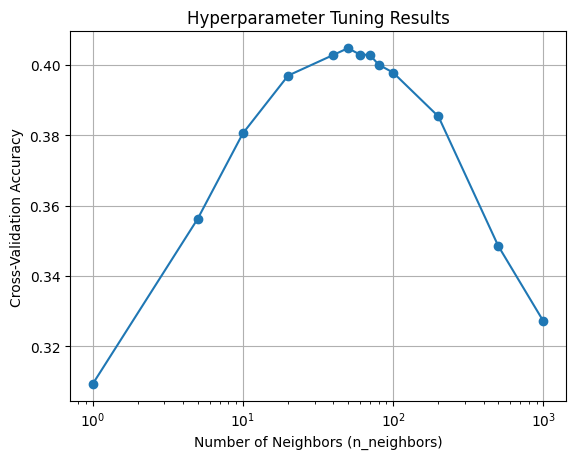

In [ ]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

In [ ]:
neighbor_values = [1, 5, 10, 20,40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="uniform")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="uniform")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")


Tuning hyperparameters with cross-validation...
n_neighbors=1, CV Accuracy=0.3093, T Accuracy = 0.3183
n_neighbors=5, CV Accuracy=0.3600, T Accuracy = 0.3627
n_neighbors=10, CV Accuracy=0.4050, T Accuracy = 0.4023
n_neighbors=20, CV Accuracy=0.4233, T Accuracy = 0.4123
n_neighbors=40, CV Accuracy=0.4353, T Accuracy = 0.4324
n_neighbors=50, CV Accuracy=0.4377, T Accuracy = 0.4274
n_neighbors=60, CV Accuracy=0.4373, T Accuracy = 0.4288
n_neighbors=70, CV Accuracy=0.4371, T Accuracy = 0.4243
n_neighbors=80, CV Accuracy=0.4339, T Accuracy = 0.4210
n_neighbors=100, CV Accuracy=0.4314, T Accuracy = 0.4162
n_neighbors=200, CV Accuracy=0.4165, T Accuracy = 0.3970
n_neighbors=500, CV Accuracy=0.3807, T Accuracy = 0.3490
n_neighbors=1000, CV Accuracy=0.3582, T Accuracy = 0.3317

Best number of neighbors: 50 with CV Accuracy: 0.4377
Test Accuracy: 0.4428


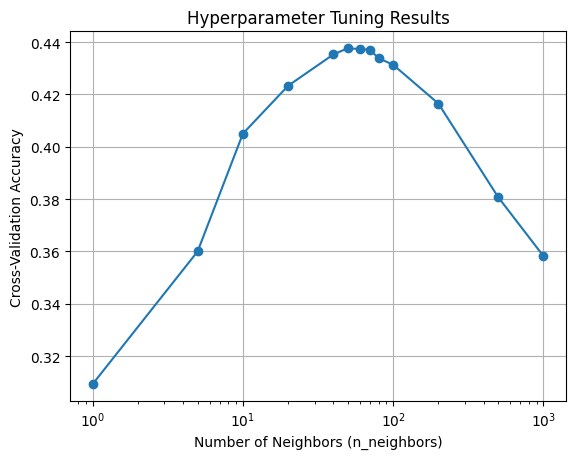

In [ ]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_dt = box_df_clean.drop("Class",axis=1)
y_dt = box_df_clean["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Training data label counts:")
print(np.array([unique, counts]))

Training data label counts:
[[   1    2    3    4    5    6    7    8    9   10]
 [ 711  610  124  214  397 1360   31  969 1216 2723]]


In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test data label counts:")
print(np.array([unique, counts]))

Test data label counts:
[[   1    2    3    4    5    6    7    8    9   10]
 [ 364  227   57   88  157  576    8  407  505 1193]]


In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
hyperparameters = [
   {
      'criterion': ['gini', 'entropy'],           
      'max_depth': [5, 10, 20, 30],               
      'min_samples_split': [2, 4, 6, 10, 15, 20, 30, 50],  
      'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200, 500]
   }
]

In [ ]:
rsc_df = RandomizedSearchCV(estimator=dtc, 
                         param_distributions=hyperparameters,
                         n_iter=50,
                         cv=5,
                         random_state=42)

In [ ]:
rsc_df.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
pd.set_option('display.max_colwidth', None)

rsc_results = pd.DataFrame(rsc_df.cv_results_)
rsc_results

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [ ]:
best_index = rsc_df.best_index_
best_index

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_index_'

In [ ]:
rsc_results.loc[best_index]

In [ ]:
best_acc = rsc_df.best_score_
best_acc

In [ ]:
predictions = dtc.predict(X_train)

In [ ]:
def compute_accuracy(predictions, actual):
   return sum(predictions == actual) / len(actual) * 100

In [ ]:
print("Training accuracy: ", compute_accuracy(predictions, y_train),"%")

In [ ]:
predictions = dtc.predict(X_test)

In [ ]:
print("Testing accuracy: ", compute_accuracy(predictions, y_test),"%")

In [ ]:
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()

In [ ]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [ ]:
describe_tree(dtc)

# Log Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
X_dt = box_df_clean.drop(["Class","energy"],axis=1)
y_dt = box_df_clean["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train = log_reg.predict(X_train)

In [ ]:
y_pred_test = log_reg.predict(X_test)

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
print("Accuracy Test:", accuracy_train)
print("\nClassification Report on Testing Data:\n", report_train)

Accuracy Test: 0.4293643313435962

Classification Report on Testing Data:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       838
           2       0.35      0.25      0.29       685
           3       0.66      0.49      0.56       147
           4       0.43      0.22      0.29       243
           5       0.56      0.33      0.42       443
           6       0.32      0.08      0.13      1552
           7       0.00      0.00      0.00        37
           8       0.57      0.43      0.49      1100
           9       0.39      0.44      0.41      1371
          10       0.42      0.79      0.55      3133

    accuracy                           0.43      9549
   macro avg       0.37      0.30      0.31      9549
weighted avg       0.38      0.43      0.37      9549



In [ ]:
print("Accuracy Test:", accuracy_test)
print("\nClassification Report on Testing Data:\n", report_test)

Accuracy Test: 0.4258793969849246

Classification Report on Testing Data:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       237
           2       0.35      0.24      0.29       152
           3       0.85      0.50      0.63        34
           4       0.61      0.32      0.42        59
           5       0.46      0.32      0.37       111
           6       0.27      0.07      0.11       384
           7       0.00      0.00      0.00         2
           8       0.57      0.45      0.51       276
           9       0.38      0.44      0.41       350
          10       0.42      0.77      0.54       783

    accuracy                           0.43      2388
   macro avg       0.39      0.31      0.33      2388
weighted avg       0.37      0.43      0.37      2388



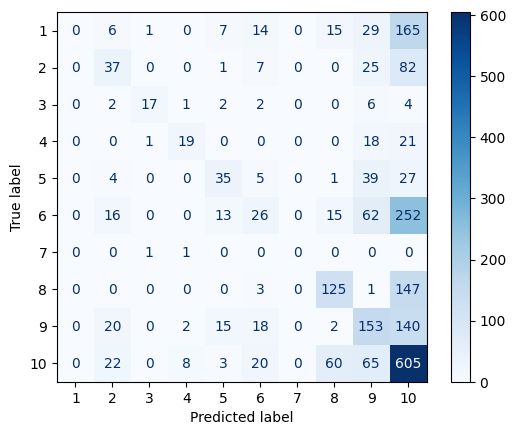

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues") 

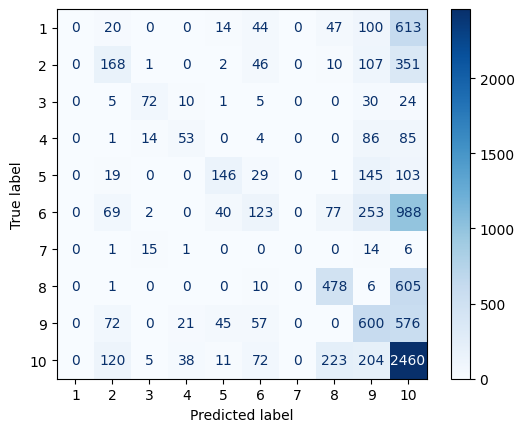

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues") 

### Tuning the hyperparameter

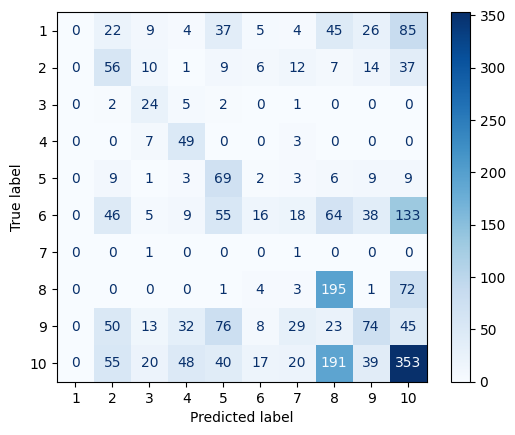

In [ ]:
log_reg = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 35.05%


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Hyperparameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 44.14%


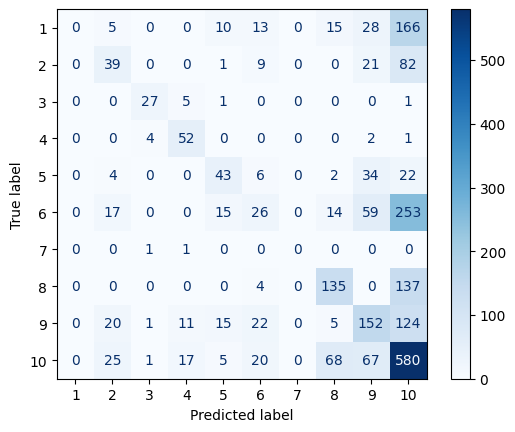

In [ ]:
param_grid = [
    # For 'liblinear' solver, which supports 'l1' and 'l2'
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300], 'class_weight': ['balanced', None]},
    
    # For 'saga' solver, which supports 'l1' and 'l2'
    {'solver': ['saga'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300], 'class_weight': ['balanced', None]},
    
    # For 'newton-cg' solver, which supports only 'l2' penalty
    {'solver': ['newton-cg'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300], 'class_weight': ['balanced', None]}
]

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap="Blues")